# Foundations of Data Science
Winter 2025
Group 17

## Team members
- Jack (Xianguo) Hao
- Kunwar Dhruv Sethi
- Eric Ramalheiro
- Lucas Hele
- Faiza Qayoom
- Miguel Morales

---

## **1. Problem Definition**

### **1.1 Hypothesis and Objectives of our Analysis**

The affordability of different regions is significantly influenced by the comparison between the total cost of living and the average family income. This study will explore key questions about how household size and structure, as well as geographic location, impact the total cost of living, including the linearity or non-linearity of cost relative to household size.

Specifically:
- Metropolitan vs. Non-Metropolitan Areas:
Metropolitan areas typically have higher living costs, particularly for housing, transportation, and goods. Non-metropolitan areas generally exhibit a lower cost of living relative to income. This disparity is largely due to differences in housing markets, public transportation availability, and the concentration of goods and services in urban areas.

- Key Expense Categories:
Housing, transportation, and healthcare are the primary contributors to the cost of living. In metropolitan areas, housing tends to be the most significant expense, driven by high demand and limited supply. Transportation costs also tend to be higher in cities with less access to public transit. Non-metropolitan areas may see higher costs in some categories, but they often experience lower housing and transportation costs relative to income.

- Cost of Living and Household Size:
The total cost of living may not be linearly related to household size—it could be sub-linear or super-linear. As household size increases, some costs (e.g., food, utilities) may scale less than proportionally, while others (e.g., housing) may increase at a faster rate. The impact of family structure (e.g., parents vs. children) on cost should also be considered, as different family dynamics may influence expenses differently.

- Exploring Linearity (or Non-Linearity) of Costs as a Function of Household Size:
One of the central questions of this study is whether the total cost of living scales linearly with household size, or if it is sub-linear (costs increase less than proportionally with more members) or super-linear (costs increase more than proportionally). Additionally, the analysis will explore the following:
Is the total cost a linear function of the number of household members, or is it sub-linear or super-linear?
Considering cost as a function of 1 variable (total household members) or as a function of 2 variables (e.g., parents and children). Additionally, we will explore whether households follow the nuclear family model or if there are other family structures in the data (which could affect the relationship between size and cost).
Does the function vary over location? We will assess whether the relationship between household size and cost differs across metropolitan and non-metropolitan areas and whether we need to normalize the data by location.
If we analyze individual costs separately (housing, transportation, healthcare), will this change the conclusions? For example, housing may exhibit different scaling behavior compared to transportation or groceries.

- Regional Variation:
The relationship between household size and cost may vary depending on geographic location. Metropolitan areas may see more pronounced increases in housing costs as household size grows, while non-metropolitan areas may experience more stable or lower increases. Normalizing for regional differences will be necessary to understand the broader patterns of affordability.

- Individual Expense Categories:
Analyzing cost components individually (housing, transportation, healthcare) may yield different insights compared to considering total costs. For example, transportation may represent a larger share of the total cost in non-metropolitan areas, while housing will likely be the dominant cost in metropolitan regions. Examining these expenses separately can provide a clearer understanding of the drivers of cost in different regions.

---

## **2. Data Preparation**

### **2.1 Package requirements**

Besides the default Python Anaconda installation (Python version 3.12.7), please install the following additional packages:
- Geopandas

### **2.2 Importing Modules**

In [89]:
# Importing libraries for data manipulation
import pandas as pd
import numpy as np

# Importing libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Patch
import matplotlib.colors as mcolors

# Importing libraries for statistical analysis
import statsmodels.api as sm

# Importing libraries for machine learning
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Importing libraries for geospatial analysis
import geopandas as gpd

#Importing libraries for an interactive charts
import plotly.express as px


### **2.3 Reading the data**

In [3]:
# Load the dataset
# The dataset contains the cost of living in various US cities
df = pd.read_csv('../data/cost_of_living_us.csv', na_values = '\xa0')
df.head(4)
#df.tail(4)

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062


### **2.4 Inspecting the Data**

Checking for missing values and Garbage values

In [4]:
# Using the info() method to get a summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31430 non-null  int64  
 1   state                   31430 non-null  object 
 2   isMetro                 31430 non-null  bool   
 3   areaname                31430 non-null  object 
 4   county                  31430 non-null  object 
 5   family_member_count     31430 non-null  object 
 6   housing_cost            31430 non-null  float64
 7   food_cost               31430 non-null  float64
 8   transportation_cost     31430 non-null  float64
 9   healthcare_cost         31430 non-null  float64
 10  other_necessities_cost  31430 non-null  float64
 11  childcare_cost          31430 non-null  float64
 12  taxes                   31430 non-null  float64
 13  total_cost              31430 non-null  float64
 14  median_family_income    31420 non-null

In [5]:
# Using the describe() method to get a summary of the DataFrame
# Note - Describe for int / float values
df.describe()

,case_id,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
count,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31420.000000
mean,1589.311804,11073.673539,8287.504557,13593.856381,13394.031748,7015.318377,9879.584233,7657.714782,70901.683601,68315.997017
std,917.218414,4165.606147,3271.140249,1640.456562,5204.545710,2397.415490,6778.223399,3339.795571,21846.545235,16886.970245
min,1.000000,4209.311280,2220.276840,2216.461440,3476.379960,2611.642080,0.000000,1027.800756,30087.662400,25529.976562
25%,792.000000,8580.000000,5801.424360,12535.159800,9667.440000,5286.354120,5341.621590,5597.970360,53776.019400,57223.988281
50%,1593.000000,10416.000000,8129.156280,13698.164400,13082.700000,6733.056120,10166.340120,6898.468860,70977.682800,65955.605469
75%,2386.000000,12444.000000,10703.624280,14765.758500,16657.816800,8413.090230,14276.377800,8790.207270,85371.341100,76136.070312
max,3171.000000,61735.587600,31178.619600,19816.482000,37252.274400,28829.443200,48831.085200,47753.390400,223717.548000,177662.468750


In [6]:
#Note - Data describe for Object values
df.describe(include=['O'])

,state,areaname,county,family_member_count
count,31430,31430,31430,31430
unique,51,2561,1877,10
top,TX,"Atlanta-Sandy Springs-Roswell, GA HUD Metro FM...",Washington County,1p0c
freq,2540,240,300,3143


In [7]:
# Duplicate Data 
# Check for duplicate rows in the DataFrame
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.count()

case_id                   0
state                     0
isMetro                   0
areaname                  0
county                    0
family_member_count       0
housing_cost              0
food_cost                 0
transportation_cost       0
healthcare_cost           0
other_necessities_cost    0
childcare_cost            0
taxes                     0
total_cost                0
median_family_income      0
dtype: int64

In [8]:
# Null Data
# Checking for null values in the DataFrame
df.isnull().sum()

case_id                    0
state                      0
isMetro                    0
areaname                   0
county                     0
family_member_count        0
housing_cost               0
food_cost                  0
transportation_cost        0
healthcare_cost            0
other_necessities_cost     0
childcare_cost             0
taxes                      0
total_cost                 0
median_family_income      10
dtype: int64

### **2.5 Initial Observations**

1. The data set contains 31430 rows and 15 columns 
2. Max case_id value is 3171, however each row should have unique value and max value should be 31430 does this mean there are duplicate case_id values, and if yes what does that mean ? Additionally, as per duplicate check there are no duplicate rows. Further analysis is required and also if it would make sense to type cast this column to string / object.
3. Childcare_cost has $0 values - does that mean there is missing values?
4. There are 51 unique state values - further investigation is required, considering there are 50 States in United States
5. Does values in 'areaname' columns are concatenated ? for instance 'Atlanta-Sandy.. ' and 'GA HUD Metro ..' is same area name or separate areanames
6. values in family_member_count also requires further investigation as it seems values in this field are coded. For instance does 1p0c means 1 person and no child ? if yes, this column is good candidate for Feature Engineer i.e. split parent and childrens information. 
7. there are 10 ( 0.03% ) rows where median_family_income is Null. Potentially can drop these rows 10 rows without as the count is not significant (however will inspect for any pattern of Null rows i.e. all from same state/county etc.)
8. As per wikipedia, in US there are 3,244 counties, however the dataset used for analysis only has data for 1877 counties. This indicates the data set is subset of US counties and is not representing the full population ( Wiki Link https://en.wikipedia.org/wiki/List_of_United_States_counties_and_county_equivalents#:~:text=In%20total%2C%20the%2050%20states,United%20States%20as%20county%20equivalents.) Note: After further analysis, the data set has data for 3133 counties and for 89 counties data is not available. The unique county count fo 1877 is misleading since, same county name is reused in multiple states for example 'Washington Conunty' is common against 30 states. Additionally, Puerto Rico state has the majority of data missing (78 counties) followed by Connecticut and Alaska, for which we don't have county data for 9 and 2 counties respectively.

### **2.6 Rough work**

In [9]:
# Note - investigating case_id
df[df['case_id'] == 3].head(3)

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
20,3,AL,False,"Barbour County, AL",Barbour County,1p0c,5856.0,3237.03924,10890.72876,5686.79004,3294.76680,0.00000,5458.27740,34423.6020,42822.753906
21,3,AL,False,"Barbour County, AL",Barbour County,1p1c,7776.0,4770.60900,11436.48264,8495.95680,4546.13124,4846.73616,5425.51176,47297.4288,42822.753906
22,3,AL,False,"Barbour County, AL",Barbour County,1p2c,7776.0,6989.73852,12036.79440,11305.12356,5350.20960,11644.67508,6235.30884,61337.8476,42822.753906


In [10]:
# According to the original kaggle dataset, case_id is defined as: 'Unique identifier for each areaname.'
# However, there are 3171 case_id's (or at least that's the largest value for case_id - maybe they're not all consecutive),
# and there are only 2561 areaname values - something is missing here.

# Theory: cased_id refers to the unique identifier for each unique 2-tuple of (areaname,county) and a lot of the county names are duplicated.
unique_elements = df['case_id'].nunique()
print(f"Unique case_id values: {unique_elements}")

Unique case_id values: 3143


In [11]:
# There are 28 missing (3171-3143=28) - how strange

# case_id ranges between 1 and 3171
missing_case_id = {i+1 for i in range(3171)} - set(df['case_id'].value_counts().keys().to_list())
missing_case_id

{310,
 311,
 315,
 317,
 318,
 320,
 1187,
 1195,
 1202,
 1203,
 1230,
 1232,
 1233,
 1234,
 1237,
 1242,
 1245,
 1247,
 1250,
 1251,
 1252,
 1793,
 1794,
 1797,
 1798,
 1799,
 2342,
 2345}

In [12]:
# Well that's not a random subset - it's far too clustered.

# Speculation - case_id could be some univerally agreed upon numbering system for identifying locations with numbers, and we happen to not have any data for those missing 28 locations.
# Alternatively, we could be missing data - the url of the kaggle dataset does specify 3171 counties, even though the current name is only 1877 counties.
    # It's possible that the initial version had more data, but perhaps was missing data or had null values.
    # later versions had cleaning performed which resulted dropping rows and now we have no data for those 28 areanames.
    # On the other hand, the maximum value of case_id is 3171, so maybe this was simply a typo when the dataset was initially posted.

# Moving on, how many 2-tuples of (areaname,county) are there?
# This is the same as the number of unique areanames and counties.
# We can check this by grouping by areaname and county, and counting the number of unique values in each group.
df.groupby(['areaname', 'county']).count()

case_id  state  \
areaname                             county                             
Abbeville County, SC                 Abbeville County       10     10   
Abilene, TX MSA                      Callahan County        10     10   
                                     Jones County           10     10   
                                     Taylor County          10     10   
Acadia Parish, LA HUD Metro FMR Area Acadia Parish          10     10   
...                                                        ...    ...   
Yuma County, CO                      Yuma County            10     10   
Yuma, AZ MSA                         Yuma County            10     10   
Zapata County, TX                    Zapata County          10     10   
Zavala County, TX                    Zavala County          10     10   
Ziebach County, SD                   Ziebach County         10     10   

                                                       isMetro  \
areaname                             county                      
Abbeville County, SC                 Abbeville County       10   
Abilene, TX MSA                      Callahan County        10   
                                     Jones County           10   
                                     Taylor County          10   
Acadia Parish, LA HUD Metro FMR Area Acadia Parish          10   
...                                                        ...   
Yuma County, CO                      Yuma County            10   
Yuma, AZ MSA                         Yuma County            10   
Zapata County, TX                    Zapata County          10   
Zavala County, TX                    Zavala County          10   
Ziebach County, SD                   Ziebach County         10   

                                                       family_member_count  \
areaname                             county                                  
Abbeville County, SC                 Abbeville County                   10   
Abilene, TX MSA                      Callahan County                    10   
                                     Jones County                       10   
                                     Taylor County                      10   
Acadia Parish, LA HUD Metro FMR Area Acadia Parish                      10   
...                                                                    ...   
Yuma County, CO                      Yuma County                        10   
Yuma, AZ MSA                         Yuma County                        10   
Zapata County, TX                    Zapata County                      10   
Zavala County, TX                    Zavala County                      10   
Ziebach County, SD                   Ziebach County                     10   

                                                       housing_cost  \
areaname                             county                           
Abbeville County, SC                 Abbeville County            10   
Abilene, TX MSA                      Callahan County             10   
                                     Jones County                10   
                                     Taylor County               10   
Acadia Parish, LA HUD Metro FMR Area Acadia Parish               10   
...                                                             ...   
Yuma County, CO                      Yuma County                 10   
Yuma, AZ MSA                         Yuma County                 10   
Zapata County, TX                    Zapata County               10   
Zavala County, TX                    Zavala County               10   
Ziebach County, SD                   Ziebach County              10   

                                                       food_cost  \
areaname                             county                        
Abbeville County, SC                 Abbeville County         10   
Abilene, TX MSA                      Callahan County          10   
                                   

In [13]:
# Since there are 3143 rows of the above grouped dataframe, there are in fact 3143 different 2-tuples of (areaname, county).
# This is precisely the number of different case_id's, so we just need to check that they perfectly overlap.

# But first, why are they all 10?
df.groupby(['areaname', 'county']).count()['case_id'].value_counts()

case_id
10    3143
Name: count, dtype: int64

In [14]:
# It seems we have exactly 10 rows per case_id.
# If we group by case_id, areaname, and county and end up with exactly 3143 rows again, then this mystery is solved.
df.groupby(['case_id', 'areaname', 'county']).count().shape

(3143, 12)

Therefore, the attribute 'case_id' refers not to the index of the row, but instead a unique numeric identifier for each unique ('areaname', 'county') 2-tuple. The values that 'case_id' takes range between 1 and 3171, however, 28 numbers are skipped as there are only 3143 unique values. Further investigation is required to explain this.

There is also exactly 10 rows of data per 'case_id' value.

In [15]:
# Now checking childcare_cost
# Childcare cost is sometimes 0 - is this a problem? are there missing values?
# if there aren't any children in the household, then it would make sense that the childcare costs are also 0.
# if these are the only instances of 0 childcare costs, then there is no problem.

df[df['childcare_cost'] == 0]['family_member_count'].value_counts()

family_member_count
1p0c    3143
2p0c    3143
Name: count, dtype: int64

In [16]:
# That is exactly the case.
# Another question: are those numbers exactly 10% of our dataset?
df['family_member_count'].value_counts()

family_member_count
1p0c    3143
1p1c    3143
1p2c    3143
1p3c    3143
1p4c    3143
2p0c    3143
2p1c    3143
2p2c    3143
2p3c    3143
2p4c    3143
Name: count, dtype: int64

In [17]:
# There are exactly 10 rows per case_id and each family_member_count is represented exactly 1/10th of the time - is this related?
df.groupby(['family_member_count', 'case_id']).count().shape

(31430, 13)

The attribute 'childcare_cost' is sometimes 0, which is a red flag. However, it only occurs when the household happens to have no children, so it's entirely reasonable (also, it's always 0 when the household has no children).

Also, family_member_count has only 10 different possible values, each represented by a tenth of the total dataset. Furthermore, for each value of case_id, there are 10 rows - and each of these rows has one of the different values of 'family_member_count'.

In [18]:
# There are 51 states in our dataset, but aren't there only 50?

us_states = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas", "CA": "California", 
    "CO": "Colorado", "CT": "Connecticut", "DE": "Delaware", "FL": "Florida", "GA": "Georgia",
    "HI": "Hawaii", "ID": "Idaho", "IL": "Illinois", "IN": "Indiana", "IA": "Iowa",
    "KS": "Kansas", "KY": "Kentucky", "LA": "Louisiana", "ME": "Maine", "MD": "Maryland",
    "MA": "Massachusetts", "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi", "MO": "Missouri",
    "MT": "Montana", "NE": "Nebraska", "NV": "Nevada", "NH": "New Hampshire", "NJ": "New Jersey",
    "NM": "New Mexico", "NY": "New York", "NC": "North Carolina", "ND": "North Dakota", "OH": "Ohio",
    "OK": "Oklahoma", "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island", "SC": "South Carolina",
    "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas", "UT": "Utah", "VT": "Vermont",
    "VA": "Virginia", "WA": "Washington", "WV": "West Virginia", "WI": "Wisconsin", "WY": "Wyoming"
}

df_states = set(df['state'].value_counts().keys().to_list())
# get the states in our dataset as a set
fifty_states = set(us_states.keys())
# get the actual 50 states as a set
df_states - fifty_states
# perform set subtraction to determine the extra state

# The extra state is DC - District of Columbia.
# This is a federal district, not a state, but it is included in the dataset as a state.
# This is a common practice in datasets that include US states, as DC is often treated as a state for statistical purposes.

# Updating the us_states dictionary to include DC
us_states["DC"] = "District of Columbia"


### **2.7 Dealing with the "10 Null values"**


The 10 missing values for 'median_family_income' all come from the same case_id (all the rows for that case_id value have this data missing).
These 10 missing values are relative few in comparison to the entire database.
One reasonable way to fill in these 10 values is to use the average of the median family income based on the area, the state, and if it is metro or note

In [19]:
# The 10 rows with null values for median_family_income - each case_id value has 10 rows
df[df['median_family_income'].isnull()]

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
15110,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p0c,8052.0,3019.16160,11086.4934,6505.34988,4011.51852,0.00000,6075.80856,38750.3316,NaN
15111,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p1c,11256.0,4449.51084,11722.2708,9930.74856,5690.72604,7555.66332,7196.82420,57801.7440,NaN
15112,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p2c,11256.0,6519.27612,12405.8652,13356.14640,6440.68356,14323.03800,8732.72244,73033.7340,NaN
15113,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p3c,14688.0,8697.00216,12854.8620,16781.54400,8473.30884,16405.30800,11755.84356,89655.8676,NaN
15114,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p4c,14688.0,10645.71900,13619.9388,20206.94280,9179.40600,16405.30800,12372.99120,97118.3088,NaN
15115,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p0c,8772.0,5535.13032,12918.5988,13010.70000,5184.03768,0.00000,7023.17208,52443.6384,NaN
15116,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p1c,11256.0,6889.02612,13557.9828,16436.09760,6574.65816,7555.66332,8939.94504,71209.3716,NaN
15117,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p2c,11256.0,8724.80352,13977.7980,19861.49760,7239.83280,14323.03800,9841.96872,85224.9372,NaN
15118,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p3c,14688.0,10652.32248,14798.7552,23286.89520,9181.79808,16405.30800,11854.97676,100868.0508,NaN
15119,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p4c,14688.0,13035.88920,14802.7416,26712.29280,10045.45896,16405.30800,12050.91480,107740.6056,NaN


In [20]:
#Fill NaN values of median_family_income with the mean of median_family_income based on state, isMetro and area
df['median_family_income'] = df.groupby(['state','isMetro','areaname'])['median_family_income'].transform(lambda x: x.fillna(x.mean()))

In [21]:
# Checking again for null values in the DataFrame
df.isnull().sum()

case_id                   0
state                     0
isMetro                   0
areaname                  0
county                    0
family_member_count       0
housing_cost              0
food_cost                 0
transportation_cost       0
healthcare_cost           0
other_necessities_cost    0
childcare_cost            0
taxes                     0
total_cost                0
median_family_income      0
dtype: int64

### **2.8 Data preparation for county and states**

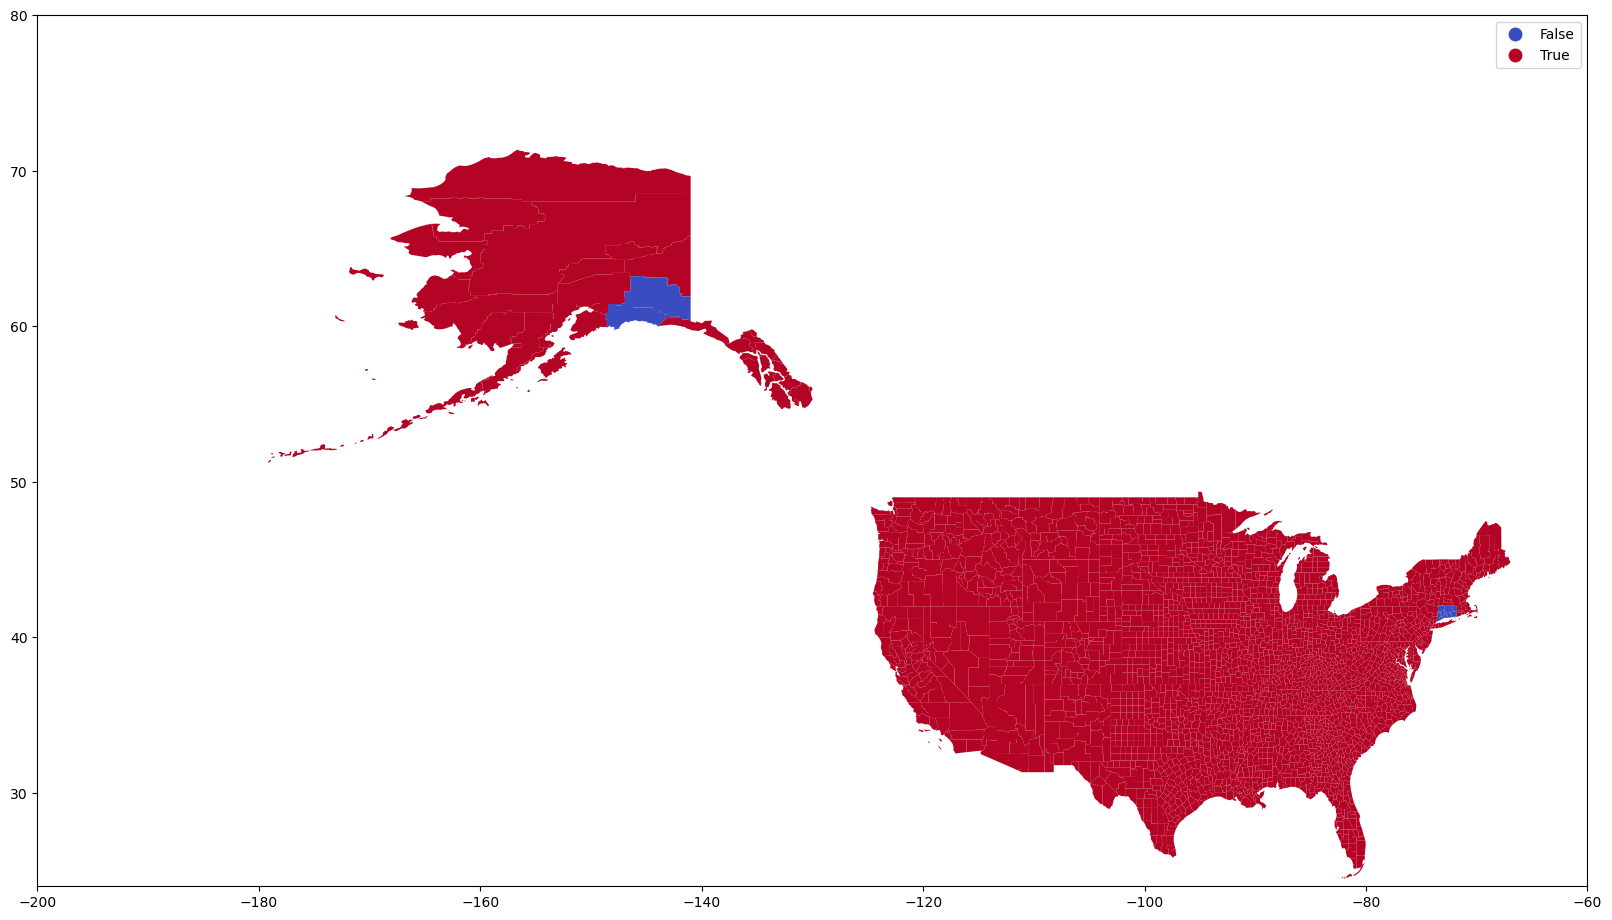

In [22]:
 #Data preparation for which counties we have data and for which we don't

# New state_county column
# Create a new column 'state_county' by concatenating 'state' and 'county' columns

# Step 1 : Combine state and county for lookup
df['state_county'] = df['state'] + '-' + df['county']

# Step 2: Use a FIPS reference file
fips_ref = pd.read_csv("https://raw.githubusercontent.com/kjhealy/fips-codes/master/state_and_county_fips_master.csv")

## there were few State-County pairs in DF dataFrame which did not exist in Fibs Data Set, appending FIBS code for these data sets 
new_data = pd.DataFrame({
'fips':['02158','17099','29211','35013','46102'],
'name':['Kusilvak Census Area','La Salle County','Sullivan part','Dona Ana County','Oglala Lakota County'],
'state':['AK','IL','MO','NM','SD']
})

#print(fips_ref.info())
#print(fips_ref.head(2))
#print(new_data.head(1))

fips_ref = pd.concat([fips_ref, new_data], ignore_index = True)


# Check if the new data has been appended correctly
#print(fips_ref[fips_ref['fips'].isin(new_data['fips'])])

# Create same format in ref for join
fips_ref['state_county'] = fips_ref['state'] + '-' + fips_ref['name']
fips_ref['fips'] = fips_ref['fips'].apply(lambda x: str(x).zfill(5))


# Merge to get FIPS in your dataset
if 'fips' in df.columns:
    df = df.drop(columns='fips')

df = df.merge(fips_ref[['state_county', 'fips']], on='state_county', how='left')

# Step 3: Load shapefile
# Load US counties shapefile (from geopandas' datasets)
#us_counties = gpd.read_file("C:/Users/kdhru/Documents/maps/cb_2022_us_county_20m/cb_2022_us_county_20m.shp")
us_counties = gpd.read_file('../data/cb_2022_us_county_20m/cb_2022_us_county_20m.shp')

# Step 4: Add a flag for counties that exist in your data
us_counties['has_data'] = us_counties['GEOID'].isin(df['fips'])

# Step 5: Plot
#us_counties.plot(column='has_data', legend=True, figsize=(15,10), cmap='coolwarm')

ax = us_counties.plot(column='has_data', legend=True, figsize=(20, 15), cmap='coolwarm')

# Set the limits to focus on the USA region
ax.set_xlim(-200, -60)  # Longitude range for the USA
ax.set_ylim(24, 80)     # Latitude range for the contiguous USA

plt.show()

Rough work to invistigate missing FIBS value for State-county pair

In [23]:
missing_fips = df[df['fips'].isna()]

missing_summary = missing_fips['state_county'].value_counts().reset_index()
missing_summary.columns = ['state_county', 'missing_count']
print(missing_summary)

Empty DataFrame
Columns: [state_county, missing_count]
Index: []


Data for missing counties

In [24]:
us_counties.groupby('has_data').size()

has_data
False      89
True     3133
dtype: int64

In [25]:
us_counties[us_counties['has_data'] == False]

missing_summary = us_counties[us_counties['has_data'] == False]
missing_count_by_state = missing_summary.groupby(['STATE_NAME']).size().reset_index(name='missing_count')

print(missing_count_by_state)



    STATE_NAME  missing_count
0       Alaska              2
1  Connecticut              9
2  Puerto Rico             78


In [26]:
# Checking again for null values in the DataFrame
df.isnull().sum()

case_id                   0
state                     0
isMetro                   0
areaname                  0
county                    0
family_member_count       0
housing_cost              0
food_cost                 0
transportation_cost       0
healthcare_cost           0
other_necessities_cost    0
childcare_cost            0
taxes                     0
total_cost                0
median_family_income      0
state_county              0
fips                      0
dtype: int64

### **2.9 Data Enrichment, Data Transformation / Feature Engineering**

The following new columns were added to our dataframe to faciliate our analysis calculations:

| Item        | New Column           | Variable Type | Description                                                                 |
|-------------|----------------------|---------------|-----------------------------------------------------------------------------|
| 1           | state_name           | string        | Long form state name (mapped from state code, e.g. Alabama from AL)         |
| 2           | parent_count         | int           | Number of parents in the household (mapped from family_member_count)        |
| 3           | children_count       | int           | Number of children in the household (mapped from family_member_count)       |
| 4           | family_size          | int           | Total number of people in the household (mapped from family_member_count)   |
| 5           | Housing_%            | float         | Percentage of housing cost relative to the total cost                       |
| 6           | Food_%               | float         | Percentage of food cost relative to the total cost                          |
| 7           | Transportation_%     | float         | Percentage of transportation cost relative to the total cost                |
| 8           | Healthcare_%         | float         | Percentage of healthcare cost relative to the total cost                    |
| 9           | Other_%              | float         | Percentage of other costs relative to the total cost                        |
| 10          | Childcare_%          | float         | Percentage of childcare cost relative to the total cost                     |
| 11          | Taxes_%              | float         | Percentage of taxes relative to the total cost                              |
| 12          | Affordability metric | float         | Total cost as a percentage of the median income                             |
| 13          | MSA                  | string        | Metropolitan Statiscal Area (used for geographical area analysis)           |

*Note: Investigated but ultimately dropped:*

delta_cost_of_living = Difference in calculated Cost of Living - total_cost [Note: should be 0 for all rows] -> dropped since the data was correct

In [27]:
# Total cost was checked (just to confirm that it was the sum of all costs)
# Is there any difference between Cost of Living and Total Cost ?

df['total_cost_calculated'] = df['housing_cost'] + df['food_cost'] + df['transportation_cost'] + df['healthcare_cost'] + df['other_necessities_cost'] + df['childcare_cost'] + df['taxes']

df['delta_total_cost'] = df['total_cost_calculated'] - df['total_cost']
df['delta_total_cost'] = df['delta_total_cost'].astype(int)

df[(df['delta_total_cost'] < 0 ) | (df['delta_total_cost'] > 0) ].head(3)

df.groupby(['delta_total_cost'])['delta_total_cost'].sum()


# conclusion total_cost is summation of all types of costs available in the data set. 

delta_total_cost
0    0
Name: delta_total_cost, dtype: int32

In [28]:
# Drop calculated columns since the total_cost is already available in the dataset
df = df.drop(['delta_total_cost','total_cost_calculated'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31430 non-null  int64  
 1   state                   31430 non-null  object 
 2   isMetro                 31430 non-null  bool   
 3   areaname                31430 non-null  object 
 4   county                  31430 non-null  object 
 5   family_member_count     31430 non-null  object 
 6   housing_cost            31430 non-null  float64
 7   food_cost               31430 non-null  float64
 8   transportation_cost     31430 non-null  float64
 9   healthcare_cost         31430 non-null  float64
 10  other_necessities_cost  31430 non-null  float64
 11  childcare_cost          31430 non-null  float64
 12  taxes                   31430 non-null  float64
 13  total_cost              31430 non-null  float64
 14  median_family_income    31430 non-null

In [29]:
# Map state codes to state names
df['state_name'] = df['state'].map(us_states)

df.head(3)

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,state_county,fips,state_name
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062,AL-Autauga County,01001,Alabama
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062,AL-Autauga County,01001,Alabama
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062,AL-Autauga County,01001,Alabama


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31430 non-null  int64  
 1   state                   31430 non-null  object 
 2   isMetro                 31430 non-null  bool   
 3   areaname                31430 non-null  object 
 4   county                  31430 non-null  object 
 5   family_member_count     31430 non-null  object 
 6   housing_cost            31430 non-null  float64
 7   food_cost               31430 non-null  float64
 8   transportation_cost     31430 non-null  float64
 9   healthcare_cost         31430 non-null  float64
 10  other_necessities_cost  31430 non-null  float64
 11  childcare_cost          31430 non-null  float64
 12  taxes                   31430 non-null  float64
 13  total_cost              31430 non-null  float64
 14  median_family_income    31430 non-null

In [31]:
# Since family_member_count is highly structured, we don't need to do anything fancy to extract the number of parents/children.
df['parent_count'] = df['family_member_count'].str[0].astype(int)
df['children_count'] = df['family_member_count'].str[2].astype(int)
df['family_size'] = df['parent_count'] + df['children_count']

df.head(3)

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,...,childcare_cost,taxes,total_cost,median_family_income,state_county,fips,state_name,parent_count,children_count,family_size
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,...,0.0000,6392.94504,39254.0532,73010.414062,AL-Autauga County,01001,Alabama,1,0,1
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,...,6147.8298,7422.07836,57194.3256,73010.414062,AL-Autauga County,01001,Alabama,1,1,2
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,...,15824.6940,9769.56228,76141.0308,73010.414062,AL-Autauga County,01001,Alabama,1,2,3


In [32]:
# visualize 
df.groupby(['family_member_count']).agg(count_all = ('family_size', 'sum'),
    cnt_children = ('children_count', 'sum'),
    cnt_parent = ('parent_count', 'sum'),
)

,count_all,cnt_children,cnt_parent
family_member_count,,,
1p0c,3143,0,3143
1p1c,6286,3143,3143
1p2c,9429,6286,3143
1p3c,12572,9429,3143
1p4c,15715,12572,3143
2p0c,6286,0,6286
2p1c,9429,3143,6286
2p2c,12572,6286,6286
2p3c,15715,9429,6286


In [33]:
# Calculating the percentage of each cost category relative to the total cost
df["Housing_%"] = (df["housing_cost"] / df["total_cost"]) * 100
df["Food_%"] = (df["food_cost"] / df["total_cost"]) * 100
df["Transportation_%"] = (df["transportation_cost"] / df["total_cost"]) * 100
df["Healthcare_%"] = (df["healthcare_cost"] / df["total_cost"]) * 100
df["Other_%"] = (df["other_necessities_cost"] / df["total_cost"]) * 100
df["Childcare_%"] = (df["childcare_cost"] / df["total_cost"]) * 100
df["Taxes_%"] = (df["taxes"] / df["total_cost"]) * 100

In [34]:
# Creating an affordability metric (total_cost as % of median income)
# If the total cost is high relative to the median family income, it indicates lower affordability.
# In other words, a higher percentage indicates lower affordability.
# Affordability = 100 means that the total cost is equal to the median family income.
# Affordability > 100 means that the total cost is greater than the median family income.
# Affordability < 100 means that the total cost is less than the median family income.
df['affordability'] = (df['total_cost'] / df['median_family_income']) * 100

In [35]:
# Extract MSA (Metropolitan Statistical Area) information
df['MSA'] = df['areaname'].str.extract(r'^(.*?)(?: MSA|,|$)', expand=False)

In [36]:
# Showing the updated DataFrame
df.head(5)

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,...,family_size,Housing_%,Food_%,Transportation_%,Healthcare_%,Other_%,Childcare_%,Taxes_%,affordability,MSA
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,...,1,21.668409,8.801428,27.587390,14.616274,11.040423,0.000000,16.286076,53.765006,Montgomery
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,...,2,21.099125,8.902470,20.261088,15.140587,10.870762,10.749021,12.976949,78.337216,Montgomery
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,...,3,15.848882,9.797875,16.235369,15.210764,9.292832,20.783399,12.830877,104.287904,Montgomery
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,...,4,16.195943,10.564614,14.279917,15.396140,9.696405,19.959113,13.907868,129.027528,Montgomery
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,...,5,15.132531,12.082710,13.632333,17.283453,9.861155,18.648614,13.359203,138.094711,Montgomery


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31430 non-null  int64  
 1   state                   31430 non-null  object 
 2   isMetro                 31430 non-null  bool   
 3   areaname                31430 non-null  object 
 4   county                  31430 non-null  object 
 5   family_member_count     31430 non-null  object 
 6   housing_cost            31430 non-null  float64
 7   food_cost               31430 non-null  float64
 8   transportation_cost     31430 non-null  float64
 9   healthcare_cost         31430 non-null  float64
 10  other_necessities_cost  31430 non-null  float64
 11  childcare_cost          31430 non-null  float64
 12  taxes                   31430 non-null  float64
 13  total_cost              31430 non-null  float64
 14  median_family_income    31430 non-null

---

## **3. Analysis**

#### **3.1 Metropolitan vs. Non-Metropolitan Areas:**

Metropolitan areas typically have higher living costs, particularly for housing, transportation, and goods. Non-metropolitan areas generally exhibit a lower cost of living relative to income. This disparity is largely due to differences in housing markets, public transportation availability, and the concentration of goods and services in urban areas.

In [38]:
# Regarding the Metropolitan vs. Non-Metropolitan areas cost of living. The dataset contains a column called 'isMetro' which indicates whether the area is metropolitan or not.
# We can use this column to filter the DataFrame and analyze the cost of living in metropolitan vs non-metropolitan areas.
df.groupby(['isMetro']).agg(average_TOTAL_COST=('total_cost', lambda x: f"${x.mean():,.2f}"))


,average_TOTAL_COST
isMetro,
False,"$67,588.02"
True,"$76,489.60"


In [39]:
# We can also visualize the average cost of living in metropolitan vs non-metropolitan areas of all the expenses that contribute to the total cost of living.
cost_means = df.groupby(['isMetro']).agg(average_TOTAL_COST=('total_cost', 'mean'),
                                        average_housing_cost=('housing_cost', 'mean'),
                                        average_food_cost=('food_cost', 'mean'),
                                        average_transportation_cost=('transportation_cost', 'mean'),
                                        average_healthcare_cost=('healthcare_cost', 'mean'),
                                        average_other_necessities_cost=('other_necessities_cost', 'mean'),
                                        average_childcare_cost=('childcare_cost', 'mean'),
                                        average_taxes=('taxes', 'mean')
)
# For visualization purposes, we can also convert the means to a currency format
formatted_cost_means = df.groupby(['isMetro']).agg(average_TOTAL_COST=('total_cost', lambda x: f"${x.mean():,.2f}"),
                                         average_housing_cost=('housing_cost', lambda x: f"${x.mean():,.2f}"),
                                         average_food_cost=('food_cost', lambda x: f"${x.mean():,.2f}"),
                                         average_transportation_cost=('transportation_cost', lambda x: f"${x.mean():,.2f}"),
                                         average_healthcare_cost=('healthcare_cost', lambda x: f"${x.mean():,.2f}"),
                                         average_other_necessities_cost=('other_necessities_cost', lambda x: f"${x.mean():,.2f}"),
                                         average_childcare_cost=('childcare_cost', lambda x: f"${x.mean():,.2f}"),
                                         average_taxes=('taxes', lambda x: f"${x.mean():,.2f}"))
formatted_cost_means

,average_TOTAL_COST,average_housing_cost,average_food_cost,average_transportation_cost,average_healthcare_cost,average_other_necessities_cost,average_childcare_cost,average_taxes
isMetro,,,,,,,,
False,"$67,588.02","$9,895.31","$8,165.38","$13,721.75","$13,707.95","$6,544.10","$8,729.84","$6,823.69"
True,"$76,489.60","$13,060.78","$8,493.45","$13,378.19","$12,864.67","$7,809.95","$11,818.43","$9,064.14"


In [40]:
# Compare metropolitan (True) vs non-metropolitan (False) costs
is_metro_more_expensive = (cost_means.loc[True] > cost_means.loc[False]).replace({True: 'yes', False: 'no'})

# Convert the result to a DataFrame for better readability
summary_df = is_metro_more_expensive.to_frame(name='is the Metropolitan Area more expensive?')

# Display the summary DataFrame
summary_df

,is the Metropolitan Area more expensive?
average_TOTAL_COST,yes
average_housing_cost,yes
average_food_cost,yes
average_transportation_cost,no
average_healthcare_cost,no
average_other_necessities_cost,yes
average_childcare_cost,yes
average_taxes,yes


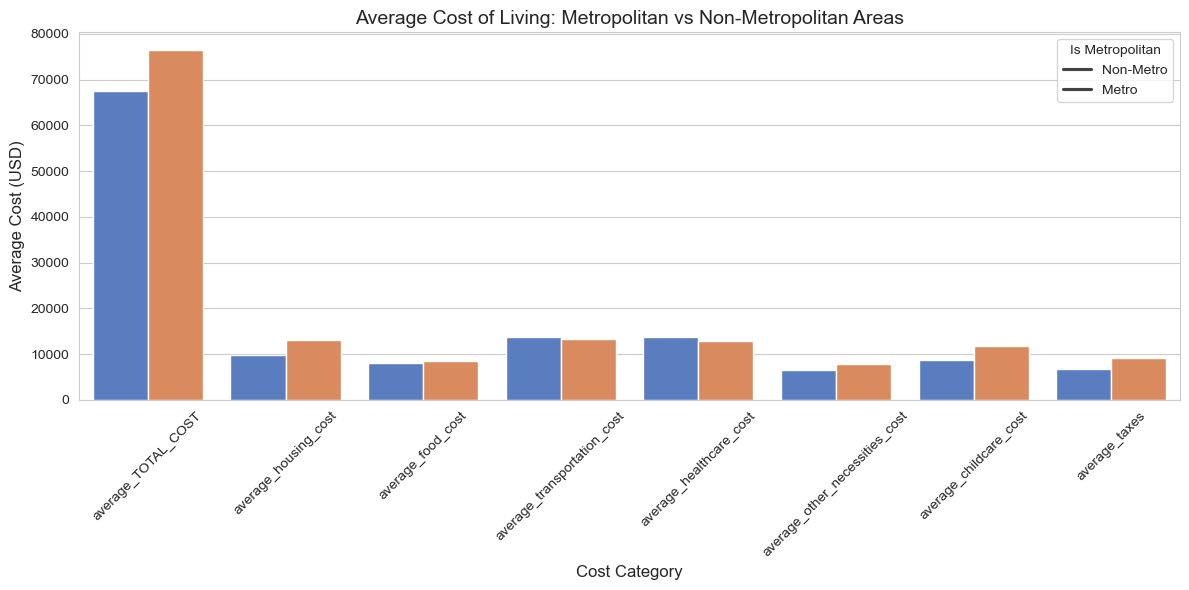

In [41]:
# Let's visualize the average cost of living in metropolitan vs non-metropolitan areas in a bar plot.
# For the bar plot, we will use the average total cost and the average costs of each category, already calculated in cost_means.

# Set the style for the plot
sns.set_style("whitegrid")

# Reset the index of cost_means for easier plotting to be able to use isMetro as a hue
cost_means_reset = cost_means.reset_index()

# Melt the DataFrame to make it suitable for seaborn's barplot
cost_means_melted = cost_means_reset.melt(id_vars=['isMetro'],  # Retain the 'isMetro' column
                                    value_vars=['average_TOTAL_COST', 'average_housing_cost', 'average_food_cost', 'average_transportation_cost', 
                                                'average_healthcare_cost', 'average_other_necessities_cost', 'average_childcare_cost', 'average_taxes'],
                                    var_name='Cost Category', 
                                    value_name='Average Cost')

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=cost_means_melted, x='Cost Category', y='Average Cost', hue='isMetro', palette='muted')

# Add labels and title
plt.title('Average Cost of Living: Metropolitan vs Non-Metropolitan Areas', fontsize=14)
plt.xlabel('Cost Category', fontsize=12)
plt.ylabel('Average Cost (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Is Metropolitan', labels=['Non-Metro', 'Metro'])

# Show the plot
plt.tight_layout()
plt.show()

In [42]:
# We can also extend the analysis by looking at our affordability metric.
# We can visualize the average affordability in metropolitan vs non-metropolitan areas.

metro_stats = df.groupby('isMetro').agg({
    'total_cost': 'mean',
    'median_family_income': 'mean',
    'affordability': 'mean'
})

# For visualization purposes, we can also convert the metro_stats to a currency format
metro_stats_formatted = metro_stats.copy()
metro_stats_formatted[['total_cost', 'median_family_income']] = metro_stats_formatted[['total_cost', 'median_family_income']].map(lambda x: f"${x:,.2f}")

print("The Total Cost and Affordability by Metro:\n")
print(metro_stats_formatted)

The Total Cost and Affordability by Metro:

         total_cost median_family_income  affordability
isMetro                                                
False    $67,588.02           $62,826.03     110.972323
True     $76,489.60           $77,582.63     101.436268


In [43]:
# We can observe that the average total cost of living (in absolut terms) is higher in metropolitan areas compared to non-metropolitan areas, 
# If we take into consideration the median family income, via our affordability metric, we can see that the average total cost of living based on average income
# is actually slightly lower in metropolitan areas! (The affordability metric is lower in metropolitan areas).  

# Remembering:
# Affordability = 100 means that the total cost is equal to the family income.
# Affordability > 100 means that the total cost is greater than the family income.
# Affordability < 100 means that the total cost is less than the family income.

# In other words, in average it seems that the cost of living is more affordable in metropolitan areas than in non-metropolitan areas.
# This is a very interesting finding, and it might be related to the fact that metropolitan areas usually have higher salaries than non-metropolitan areas 
# (and even though they are more expensive, the higher salaroes compensate for it)

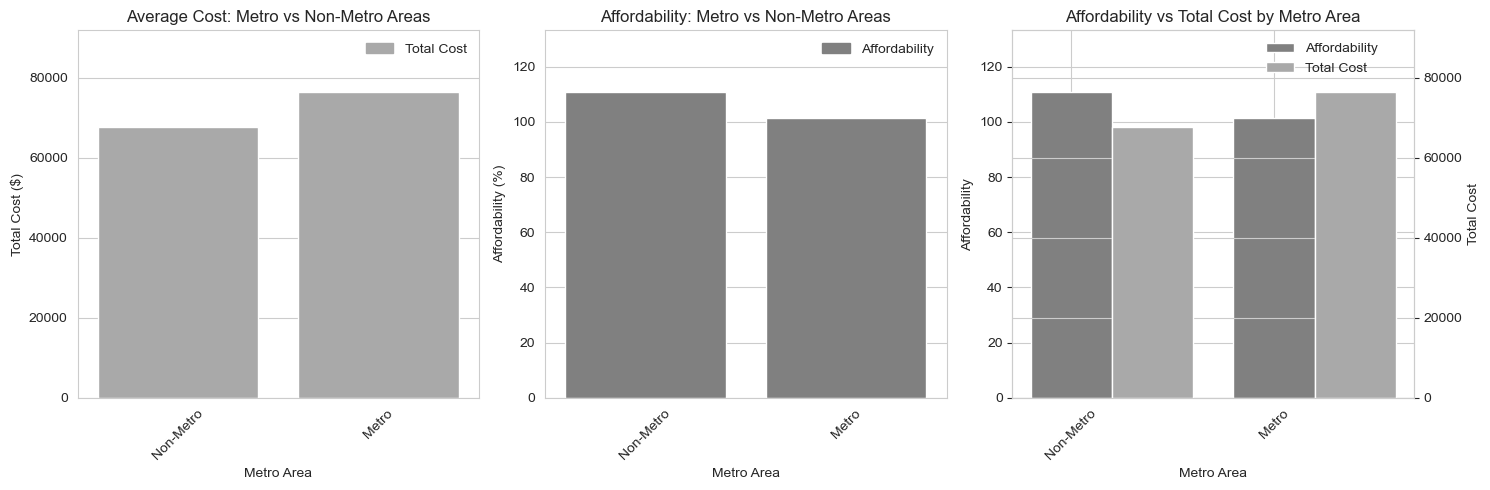

In [44]:
# Visualizing the previous results via some graphs

# Adjusting the y-limits to add space
max_affordability_metro = metro_stats['affordability'].max()  
max_total_cost_metro = metro_stats['total_cost'].max()  
# Adding space (margin) to the max values of both y-axes by 20%
affordability_margin_metro = 0.2 * max_affordability_metro  
total_cost_margin_metro = 0.2 * max_total_cost_metro 

# Create a figure with 2 subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting the average total cost by metro area
sns.barplot(x='isMetro', y='total_cost', data=metro_stats,color='darkgrey', ax=axes[0])
axes[0].set_title('Average Cost: Metro vs Non-Metro Areas')
axes[0].set_xlabel('Metro Area')
axes[0].set_ylabel('Total Cost ($)')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Non-Metro', 'Metro'])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
cost_legend = [Patch(color='darkgrey', label='Total Cost')]
axes[0].legend(handles=cost_legend, loc='upper right', frameon=False)
axes[0].set_ylim(0, max_total_cost_metro + total_cost_margin_metro) 

# Plotting the affordability by metro area
sns.barplot(x='isMetro', y='affordability', data=metro_stats,color='grey', ax=axes[1])
axes[1].set_title('Affordability: Metro vs Non-Metro Areas')
axes[1].set_xlabel('Metro Area')
axes[1].set_ylabel('Affordability (%)')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Non-Metro', 'Metro'])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
affordability_legend = [Patch(color='grey', label='Affordability')]
axes[1].legend(handles=affordability_legend, loc='upper right', frameon=False)
axes[1].set_ylim(0, max_affordability_metro + affordability_margin_metro)

# Plotting the affordability vs the average of total cost by metro area
width = 0.4
x_positions_affordability_metro = range(len(metro_stats))
affordability_bars_metro = axes[2].bar(x_positions_affordability_metro, metro_stats['affordability'], width=width,
                                        label='Affordability', color='grey', align='center')
axes[2].set_ylabel('Affordability')
axes[2].set_xlabel('Metro Area')
# Plotting a second y-axis for total_cost
ax2 = axes[2].twinx()
x_positions_total_cost_metro = [x + width for x in x_positions_affordability_metro]
total_cost_bars_metro = ax2.bar(x_positions_total_cost_metro, metro_stats['total_cost'], width=width, 
                                 label='Total Cost', color='darkgrey', align='center')
ax2.set_ylabel('Total Cost')

plt.title('Affordability vs Total Cost by Metro Area')
#axes[2].set_xticks([x + width / 2 for x in x_positions_affordability_metro])  
#axes[2].set_xticklabels(metro_stats.index, rotation=45)
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['Non-Metro', 'Metro'])
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)
handles_metro, labels_metro = [], []
handles_metro.extend([affordability_bars_metro, total_cost_bars_metro])
labels_metro.extend(['Affordability', 'Total Cost'])
fig.legend(handles_metro, labels_metro, loc='upper right', bbox_to_anchor=(0.93, 0.93), frameon=False)
axes[2].set_ylim(0, max_affordability_metro + affordability_margin_metro)
ax2.set_ylim(0, max_total_cost_metro + total_cost_margin_metro)
plt.tight_layout()
plt.show()

##### **Conclusions of Metro vs Non-Metro**
We can observe that the average total cost of living (in absolut terms) is higher in metropolitan areas compared to non-metropolitan areas, 
If we take into consideration the median family income, via our affordability metric, we can see that the average total cost of living based on average income
is actually slightly lower in metropolitan areas! (The affordability metric is lower in metropolitan areas).  

Remembering:
- Affordability = 100 means that the total cost is equal to the family income.
- Affordability > 100 means that the total cost is greater than the family income.
- Affordability < 100 means that the total cost is less than the family income.

In other words, in average it seems that the cost of living is more affordable in metropolitan areas than in non-metropolitan areas.
This is a very interesting finding, and it might be related to the fact that metropolitan areas usually have higher salaries than non-metropolitan areas 
(and even though they are more expensive, the higher salaroes compensate for it)

#### **3.2 Key Expense Categories:**


Hypothesis: Housing, transportation, and healthcare are the primary contributors to the cost of living. In metropolitan areas, housing tends to be the most significant expense, driven by high demand and limited supply. Transportation costs also tend to be higher in cities with less access to public transit. Non-metropolitan areas may see higher costs in some categories, but they often experience lower housing and transportation costs relative to income.

Objective:

1. How do housing, transportation, and healthcare costs compare between metropolitan and non-metropolitan regions?

Analysis Method:

1. show a bar chart with sum of contributors accross US
2. show a bar chart with sum of contributors between Metro Vs Metro
3. Show contributors / total_cost for each state.
4. Show contributors / total_cost comparison between Metro vs Metro

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31430 non-null  int64  
 1   state                   31430 non-null  object 
 2   isMetro                 31430 non-null  bool   
 3   areaname                31430 non-null  object 
 4   county                  31430 non-null  object 
 5   family_member_count     31430 non-null  object 
 6   housing_cost            31430 non-null  float64
 7   food_cost               31430 non-null  float64
 8   transportation_cost     31430 non-null  float64
 9   healthcare_cost         31430 non-null  float64
 10  other_necessities_cost  31430 non-null  float64
 11  childcare_cost          31430 non-null  float64
 12  taxes                   31430 non-null  float64
 13  total_cost              31430 non-null  float64
 14  median_family_income    31430 non-null

C:\Users\kdhru\AppData\Local\Temp\ipykernel_11512\1960583603.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  accent_cmap = plt.cm.get_cmap("Accent")


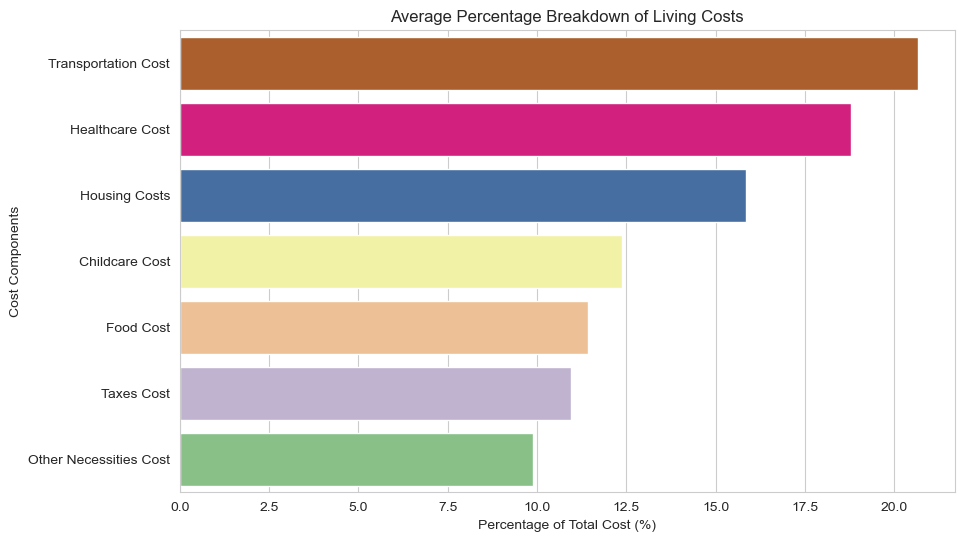

In [85]:
# User-friendly labels mapping
user_friendly_labels = {
    'housing_cost_pct': 'Housing Costs',
    'food_cost_pct': 'Food Cost',
    'transportation_cost_pct': 'Transportation Cost',
    'healthcare_cost_pct': 'Healthcare Cost',
    'other_necessities_cost_pct': 'Other Necessities Cost',
    'childcare_cost_pct': 'Childcare Cost',
    'taxes_pct': 'Taxes Cost'
}

# Calculate the percentage breakdown of costs
cost_components = ['housing_cost', 'food_cost', 'transportation_cost', 
                   'healthcare_cost', 'other_necessities_cost', 'childcare_cost', 'taxes']

for component in cost_components:
    df[f'{component}_pct'] = (df[component] / df['total_cost']) * 100

# Average percentage breakdown for each cost component
component_pct = df[[f'{c}_pct' for c in cost_components]].mean().sort_values(ascending=False)

# Map user-friendly labels to the index
component_pct.index = component_pct.index.map(user_friendly_labels)
# Reverse the component_pct.values to ensure larger values get darker colors
component_pct_normalized = (component_pct.values - component_pct.values.min()) / (component_pct.values.max() - component_pct.values.min())
# Create the color palette based on the reversed normalized values
#palette = sns.light_palette("grey", as_cmap=True)
#palette = sns.light_palette("#c0392b", as_cmap=True)
#palette = sns.color_palette("flare")


# Get colors from matplotlib colormap

num_components = len(component_pct)
accent_cmap = plt.cm.get_cmap("Accent")
palette = [accent_cmap(i / num_components) for i in range(num_components)]


# Plot the barplot with a manually adjusted color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=component_pct.values, 
            y=component_pct.index, 
            hue=component_pct_normalized,
            palette=palette,
           legend=False)  

# Title and labels
plt.title('Average Percentage Breakdown of Living Costs')
plt.xlabel('Percentage of Total Cost (%)')
plt.ylabel('Cost Components')

# Show the plot
plt.show()


**Observation 1:** Surprisingly out of Housing Cost, transportation and Healthcare costs. Cost for Transportation is higest, followed closely by healthcare cost and lowest is housing cost. Which is opposite of the assumptions

In [46]:
# Calculate Sum of Contributors 
t_contributors = df[["housing_cost", "transportation_cost", "healthcare_cost"]].mean()
t_metro_contributors = df.groupby(['isMetro'])[["housing_cost", "transportation_cost","healthcare_cost"]].mean()

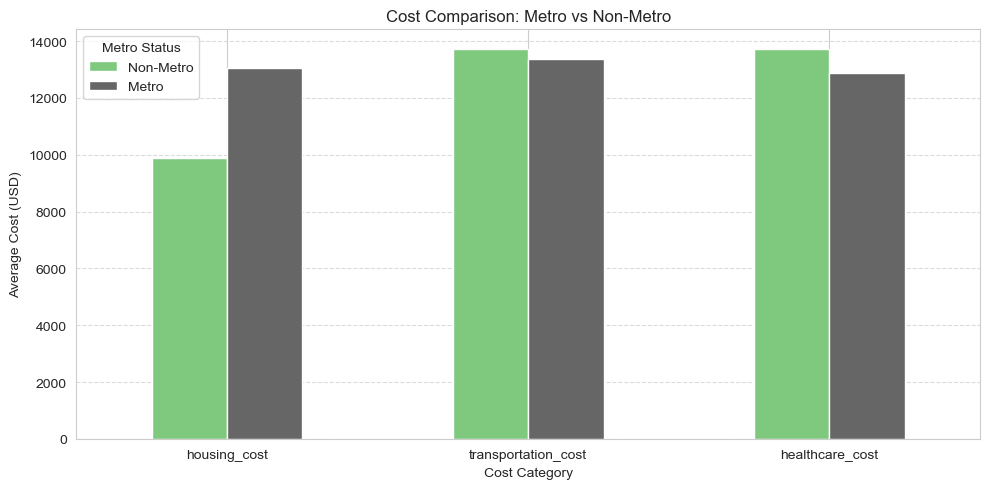

In [86]:
# Calculate Sum of Contributors 
t_contributors = df[["housing_cost", "transportation_cost", "healthcare_cost"]].mean()
t_metro_contributors = df.groupby(['isMetro'])[["housing_cost", "transportation_cost","healthcare_cost"]].mean()

ax = t_metro_contributors.T

# Rename the index so it's clean for plotting
ax.index.name = 'Cost Category'

# Plot
#ax.plot(kind='bar', figsize=(10, 5), color=['#1f77b4', '#ff7f0e'])
ax.plot(kind='bar', figsize=(10, 5), colormap="Accent")

plt.title('Cost Comparison: Metro vs Non-Metro')
plt.ylabel('Average Cost (USD)')
plt.xlabel('Cost Category')
plt.xticks(rotation=0)

# Add legend based on isMetro values
plt.legend(title='Metro Status', labels=['Non-Metro', 'Metro'])  # Adjust order if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Observation 2:** Comparing housing, transportation and healthcare costs between Metro vs Non-Metro. There is not much difference between transportation costs and healthcare costs between Metro and Non-Metro. However, Housing cost on average is higher in Metro which is expected.

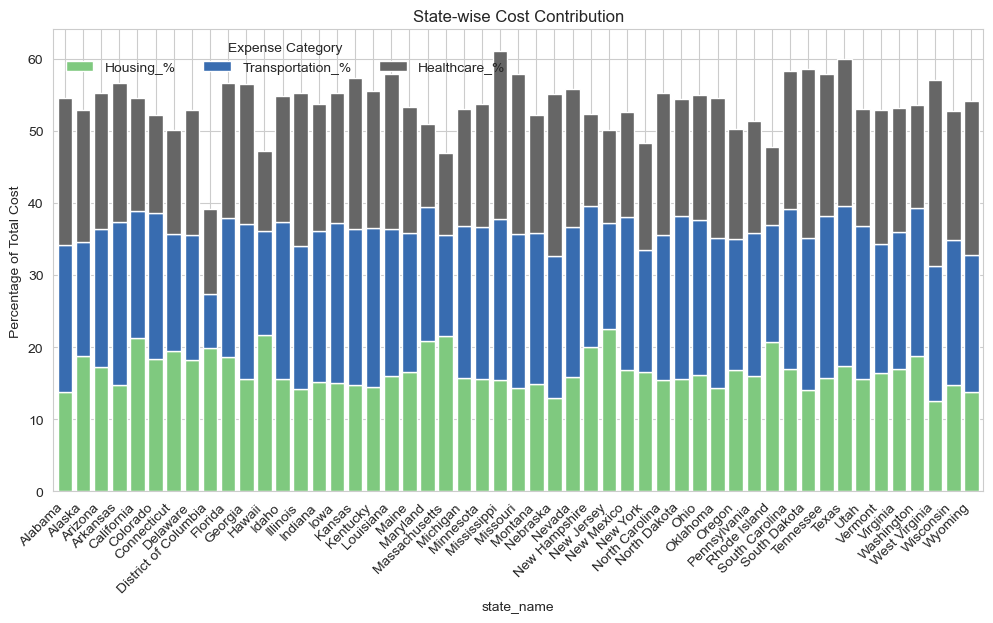

In [87]:
# State-wise comparison using pivot table
state_pivot = df.groupby(['state_name'])[["Housing_%", "Transportation_%","Healthcare_%"]].mean()

# Plotting state-wise cost contribution
#state_pivot.plot(kind="bar", stacked=True, figsize=(12, 6))
state_pivot.plot(kind="bar", stacked=True, figsize=(12, 6), width=0.8, colormap="Accent")

plt.title("State-wise Cost Contribution")
plt.ylabel("Percentage of Total Cost")
#plt.legend(title="Expense Category")
# Expense Category Legend
plt.legend(title="Expense Category",  loc='upper left', ncol=3, frameon=False)

plt.xticks(rotation=45, ha="right")
plt.show()

In [90]:
# Normalize the values so each row adds up to 100% for the 100% stacked bar plot
state_pivot_normalized = state_pivot.div(state_pivot.sum(axis=1), axis=0) * 100

# Create an interactive 100% stacked bar plot
fig = px.bar(state_pivot_normalized, 
             x=state_pivot_normalized.index, 
             y=state_pivot_normalized.columns, 
             labels={'value': 'Percentage of Total Cost', 'state_name': 'State'}, 
             color_discrete_sequence=px.colors.qualitative.Set1,  # Using Set1 color palette
             barmode='stack')

# Customize the layout
fig.update_layout(
    title="State-wise 100% Cost Contribution",  # Updated title
    xaxis_title="State",
    yaxis_title="Percentage of Total Cost",
    xaxis_tickangle=-45,
    legend_title="Expense Category",
    legend=dict(title="Expense Category", x=0.01, y=1, traceorder='normal', orientation='h')
)

# Show the interactive plot
fig.show()

**Observations:**
**Housing Costs:**
 1. Hawaii, Marryland, Massachusetts, New Hampshire and Rhonde Islands have highest housing costs - why ?
 2. Other States have more or less similar housing costs, except for Vest Viginia which in propotions has the lowest cost

**Transportation Costs:**
 1. In propotion Transportation costs 


 **Healthcare Costs:**
 1. 

#### **3.3 Cost of Living and Household Size**

In [52]:
# cost columns'food', 'transportation', 'housing', etc.
cost_columns = ['food_cost', 'transportation_cost', 'housing_cost', 'other_necessities_cost', 'healthcare_cost', 'childcare_cost', 'taxes']

# Group by household size and calculate the average cost for each category
df_grouped_family_mc = df.groupby('family_member_count')[cost_columns].mean().map(lambda x: f"${x:,.2f}")

# Visualize the average cost for each family size
df_grouped_family_mc.head(9)

,food_cost,transportation_cost,housing_cost,other_necessities_cost,healthcare_cost,childcare_cost,taxes
family_member_count,,,,,,,
1p0c,"$3,201.69","$11,108.21","$7,497.34","$3,876.68","$5,353.66",$0.00,"$5,589.62"
1p1c,"$4,718.45","$11,913.11","$10,221.17","$5,413.21","$8,087.01","$7,089.76","$6,097.35"
1p2c,"$6,910.23","$12,860.04","$10,221.17","$6,207.38","$10,730.79","$12,909.02","$6,792.25"
1p3c,"$9,219.67","$13,527.42","$13,539.02","$8,246.37","$13,374.57","$14,699.57","$8,886.64"
1p4c,"$11,286.26","$13,922.70","$13,539.02","$8,995.18","$16,018.34","$14,699.57","$8,676.39"
2p0c,"$5,869.77","$13,198.28","$8,198.64","$5,097.54","$10,707.33",$0.00,"$6,581.94"
2p1c,"$7,305.45","$14,123.27","$10,221.17","$6,350.58","$13,451.49","$7,089.76","$7,766.41"
2p2c,"$9,249.25","$14,776.93","$10,221.17","$7,054.90","$16,095.27","$12,909.02","$8,041.81"
2p3c,"$11,293.36","$15,165.12","$13,539.02","$8,997.75","$18,739.04","$14,699.57","$9,256.90"


In [53]:
# Group by household size and calculate the total cost of living for each size
total_cost_by_fmc = df.groupby('family_member_count')['total_cost'].mean()

# Creating new total_cost_by_fmc DataFrame with formatting for visualization
total_cost_by_fmc_formatted = total_cost_by_fmc.map(lambda x: f"${x:,.2f}")

# Display the results
total_cost_by_fmc_formatted.head(9)

family_member_count
1p0c    $36,627.21
1p1c    $53,540.05
1p2c    $66,630.87
1p3c    $81,493.26
1p4c    $87,137.46
2p0c    $49,653.49
2p1c    $66,308.13
2p2c    $78,348.34
2p3c    $91,690.76
Name: total_cost, dtype: object

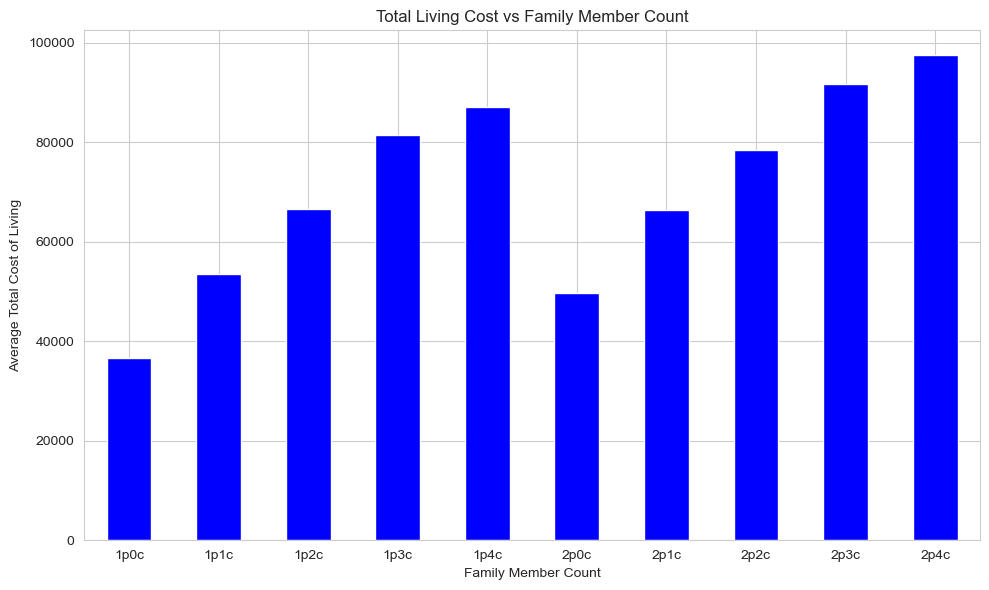

In [54]:
# Plotting the total living cost vs household size
plt.figure(figsize=(10, 6))
total_cost_by_fmc.plot(kind='bar', color='blue')

# Adding title and labels
plt.title('Total Living Cost vs Family Member Count')
plt.xlabel('Family Member Count')
plt.ylabel('Average Total Cost of Living')
plt.xticks(rotation=0)  # Keep x labels horizontal

#show plot
plt.tight_layout()
plt.show()

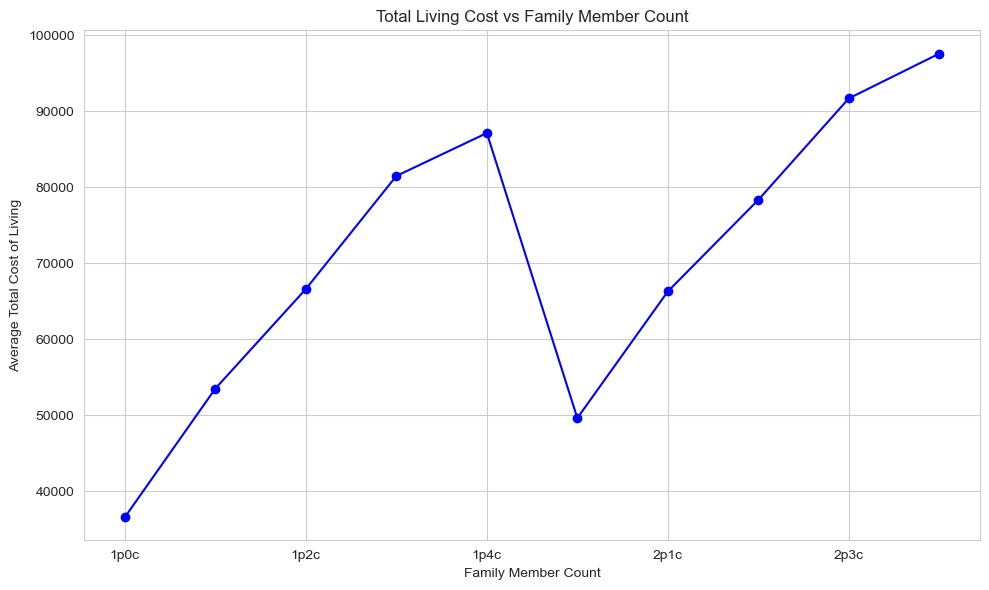

In [55]:
# Plotting the total living cost vs household size using a line graph
plt.figure(figsize=(10, 6))
total_cost_by_fmc.plot(kind='line', marker='o', color='b')

# Adding title and labels
plt.title('Total Living Cost vs Family Member Count')
plt.xlabel('Family Member Count')
plt.ylabel('Average Total Cost of Living')
plt.xticks(rotation=0)  # Keep x labels horizontal

# Show plot
plt.tight_layout()
plt.show()

In [56]:
# From the plots, we can see that the total cost of living increases with household size.
# This is expected as larger households typically have more expenses.
# However, we can repeate the same analysis using family_size (total people in the household regardless if they are adults or kids) as the x-axis to visualize the data differentyl.

# Group by household size and calculate the average cost for each category
df_grouped_family_size = df.groupby('family_size')[cost_columns].mean().map(lambda x: f"${x:,.2f}")

# Visualize the average cost for each family size
df_grouped_family_size.head(6)


,food_cost,transportation_cost,housing_cost,other_necessities_cost,healthcare_cost,childcare_cost,taxes
family_size,,,,,,,
1,"$3,201.69","$11,108.21","$7,497.34","$3,876.68","$5,353.66",$0.00,"$5,589.62"
2,"$5,294.11","$12,555.69","$9,209.90","$5,255.37","$9,397.17","$3,544.88","$6,339.65"
3,"$7,107.84","$13,491.65","$10,221.17","$6,278.98","$12,091.14","$9,999.39","$7,279.33"
4,"$9,234.46","$14,152.17","$11,880.09","$7,650.64","$14,734.92","$13,804.30","$8,464.23"
5,"$11,289.81","$14,543.91","$13,539.02","$8,996.46","$17,378.69","$14,699.57","$8,966.65"
6,"$13,820.93","$15,343.50","$13,539.02","$9,913.59","$21,382.82","$14,699.57","$8,887.83"


In [57]:
# Group by household size and calculate the total cost of living for each size
total_cost_by_size = df.groupby('family_size')['total_cost'].mean()

# Creating new total_cost_by_fmc DataFrame with formatting for visualization
total_cost_by_size_formatted = total_cost_by_size.map(lambda x: f"${x:,.2f}")

# Display the results
total_cost_by_size_formatted.head(6)

family_size
1    $36,627.21
2    $51,596.77
3    $66,469.50
4    $79,920.80
5    $89,414.11
6    $97,587.26
Name: total_cost, dtype: object

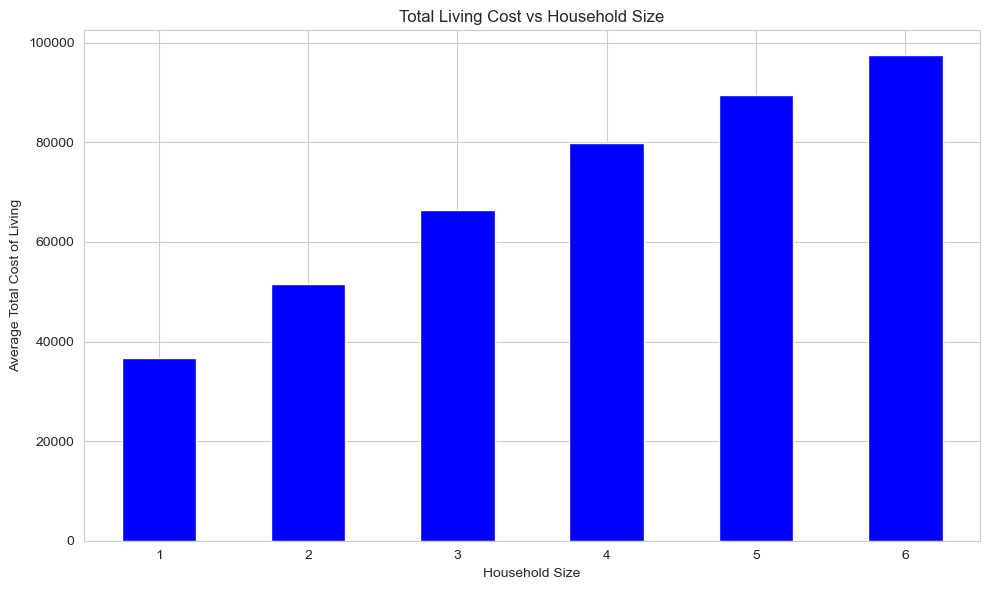

In [58]:
# Plotting the total living cost vs household size
plt.figure(figsize=(10, 6))
total_cost_by_size.plot(kind='bar', color='blue')

# Adding title and labels
plt.title('Total Living Cost vs Household Size')
plt.xlabel('Household Size')
plt.ylabel('Average Total Cost of Living')
plt.xticks(rotation=0)  # Keep x labels horizontal

#show plot
plt.tight_layout()
plt.show()

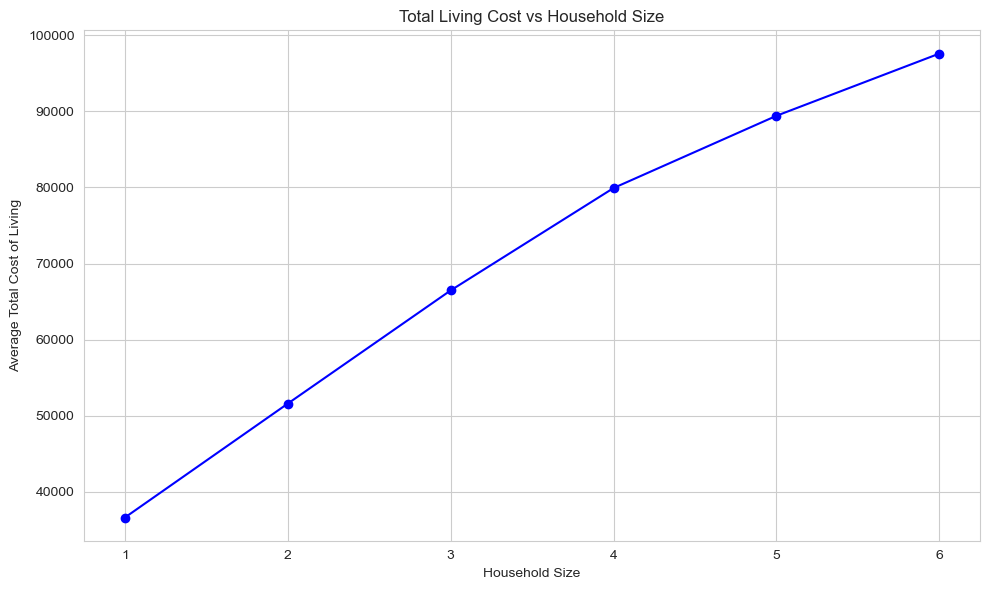

In [59]:
# Plotting the total living cost vs household size using a line graph
plt.figure(figsize=(10, 6))
total_cost_by_size.plot(kind='line', marker='o', color='b')

# Adding title and labels
plt.title('Total Living Cost vs Household Size')
plt.xlabel('Household Size')
plt.ylabel('Average Total Cost of Living')
plt.xticks(rotation=0)  # Keep x labels horizontal

# Show plot
plt.tight_layout()
plt.show()

In [60]:
#The analysis focuses on how family size impacts the total cost of living across various expense categories such as housing, food, transportation, utilities, healthcare, and education.
#By examining the relationship between household size and the total cost of living, we observe that as the number of family members increases, the total cost also increases, though not in a linear fashion.

#For smaller households (1-2 children), costs rise moderately. However, for families with 3 or more children, the costs increase at a faster rate, particularly in categories like housing (more space needed), food (more people to feed), 
#and transportation (additional vehicles or larger ones). Costs for utilities and education rise more slowly but still contribute to the overall increase.

#The analysis suggests that while basic expenses like food and utilities scale somewhat predictably, the largest cost increases are driven by the need for larger living spaces and additional resources for healthcare and education.
#This information helps highlight the financial challenges larger families face and can guide decisions around budgeting and long-term planning.

In [61]:
# We can expand our analysis by looking at the relationship between family size and our affordability metric.
# Group by family size and calculate the average affordability for each size

# Remembering:
# Affordability = 100 means that the total cost is equal to the family income.
# Affordability > 100 means that the total cost is greater than the family income.
# Affordability < 100 means that the total cost is less than the family income.

# Calculating the average affordability for each family size
family_size_stats = df.groupby('family_member_count').agg({
    'total_cost': 'mean',
    'median_family_income': 'mean',
    'affordability': 'mean'
})

# For visualization purposes, we can also convert the family_size_stats to a currency format
family_size_stats_formatted = family_size_stats.copy()
family_size_stats_formatted[['total_cost', 'median_family_income']] = family_size_stats_formatted[['total_cost', 'median_family_income']].map(lambda x: f"${x:,.2f}")
print(family_size_stats_formatted)

                     total_cost median_family_income  affordability
family_member_count                                                
1p0c                 $36,627.21           $68,319.26      55.921924
1p1c                 $53,540.05           $68,319.26      81.049279
1p2c                 $66,630.87           $68,319.26     100.665290
1p3c                 $81,493.26           $68,319.26     122.910015
1p4c                 $87,137.46           $68,319.26     131.548752
2p0c                 $49,653.49           $68,319.26      75.878247
2p1c                 $66,308.13           $68,319.26     100.758382
2p2c                 $78,348.34           $68,319.26     118.832140
2p3c                 $91,690.76           $68,319.26     138.818935
2p4c                 $97,587.26           $68,319.26     147.841748


In [62]:
# Doing the same analysis using family_size (total people in the household regardless if they are adults or kids).

# Remembering:
# Affordability = 100 means that the total cost is equal to the family income.
# Affordability > 100 means that the total cost is greater than the family income.
# Affordability < 100 means that the total cost is less than the family income.

# Calculating the average affordability for each family size
household_size_stats = df.groupby('family_size').agg({
    'total_cost': 'mean',
    'median_family_income': 'mean',
    'affordability': 'mean'
})

# For visualization purposes, we can also convert the household_size_stats to a currency format
household_size_stats_formatted = household_size_stats.copy()
household_size_stats_formatted[['total_cost', 'median_family_income']] = household_size_stats_formatted[['total_cost', 'median_family_income']].map(lambda x: f"${x:,.2f}")
print(household_size_stats_formatted)

             total_cost median_family_income  affordability
family_size                                                
1            $36,627.21           $68,319.26      55.921924
2            $51,596.77           $68,319.26      78.463763
3            $66,469.50           $68,319.26     100.711836
4            $79,920.80           $68,319.26     120.871077
5            $89,414.11           $68,319.26     135.183844
6            $97,587.26           $68,319.26     147.841748


#### **3.4 Exploring Linearity (or Non-Linearity) of Costs as a Function of Household Size**

The goal for this section is to determine if the various cost variables are a linear function of the size of the family. There are 8 cost variables - 1 total, and 7 subcategories. We can also choose to consider family size as a single variable or separate it out into 2 variables - the number of parents and the number of children. In principle, all or some or none of the cost variables may be a linear function of family size. It also could be the case that it may not be linear as a function of just the 1 variable, but it is linear as a function of the 2 variables. Thus, we're going to check all 16 combinations.

In addition, it's possible that it might be linear, but the coefficients vary by location, so we'll be filtering the dataset by location as well.

In [63]:
df_states_list = list(df_states)
isMetro_list_bool = [True, False]
cost_list = ['total_cost', 'housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost', 'other_necessities_cost', 'childcare_cost', 'taxes']

In [64]:
# the following is a function that performs linear regression on the data and returns the r2 scores.
# Specifically, we input a filtered version of our dataframe (eg. df['state'] == NY),
# then it performs linear regression on all 16 combinations of (independent variable(s), dependent variable)
# the independent variable has 2 options - either 'family_size' or 'parent_count' and 'children_count'
# the dependent variable has 8 options described in the cost_list list above
# the 16 r2 scores then get returned in a list

def get_r2_scores_row(df_filtered):
    # in the case where the dataframe has no rows, we'll return a row of 16 None's
    if df_filtered.empty:
        r2_scores_row = [None for i in range(len(cost_list) * 2)]
    else:
        r2_scores_row = []
        for cost in cost_list:
            # we start with finding the r2 score for linear regression with 1 variable
            # by default, this will be a row vector, but sklearn needs the independent variable to be a column vector, so we reshape it
            X = df_filtered['family_size'].values.reshape(-1, 1)
            Y = df_filtered[cost]
            model = sklearn.linear_model.LinearRegression().fit(X, Y)
            r2_scores_row.append(r2_score(Y, model.predict(X)))

            # now we find the r2 score for linear regression with 2 variables
            # no reshaping is necessary here - it's already a 2d array
            X = df_filtered[['parent_count', 'children_count']]
            model = sklearn.linear_model.LinearRegression().fit(X, Y)
            r2_scores_row.append(r2_score(Y, model.predict(X)))
    return r2_scores_row

In [65]:
r2_scores_list = []
r2_scores_list.append(get_r2_scores_row(df))

r2_scores_df = pd.DataFrame(r2_scores_list, 
                            columns = pd.MultiIndex.from_product([cost_list, ['family_size', 'parent_and_children']], names = ['Cost', 'Independant Variables']), 
                            index = ['Entire Dataset'])

In [66]:
r2_scores_list = []
for isMetro in isMetro_list_bool:
    r2_scores_list.append(get_r2_scores_row(df[df['isMetro'] == isMetro]))
    
r2_scores_df_isMetro = pd.DataFrame(r2_scores_list, 
                            columns = pd.MultiIndex.from_product([cost_list, ['family_size', 'parent_and_children']], names = ['Cost', 'Independant Variables']), 
                            index = pd.Index(['True', 'False'], name = 'isMetro'))

In [67]:
r2_scores_list = []
for state in df_states_list:
    r2_scores_list.append(get_r2_scores_row(df[df['state'] == state]))
        
r2_scores_df_state = pd.DataFrame(r2_scores_list, 
                            columns = pd.MultiIndex.from_product([cost_list, ['family_size', 'parent_and_children']], names = ['Cost', 'Independant Variables']), 
                            index = pd.Index(df_states_list, name = 'State'))

In [68]:
r2_scores_list = []
for state in df_states_list:
    for isMetro in isMetro_list_bool:
        r2_scores_list.append(get_r2_scores_row(df[(df['state'] == state) & (df['isMetro'] == isMetro)]))
        
r2_scores_df_state_and_isMetro = pd.DataFrame(r2_scores_list, 
                            columns = pd.MultiIndex.from_product([cost_list, ['family_size', 'parent_and_children']], names = ['Cost', 'Independant Variables']), 
                            index = pd.MultiIndex.from_product([df_states_list, ['True', 'False']], names=['State', 'isMetro']))

Now let's look at the results!

In [69]:
r2_scores_df

Cost                   total_cost                     housing_cost  \
Independant Variables family_size parent_and_children  family_size   
Entire Dataset           0.726471            0.726831     0.226706   

Cost                                        food_cost                      \
Independant Variables parent_and_children family_size parent_and_children   
Entire Dataset                   0.249351    0.904391            0.907924   

Cost                  transportation_cost                     healthcare_cost  \
Independant Variables         family_size parent_and_children     family_size   
Entire Dataset                   0.489367             0.61356        0.729143   

Cost                                      other_necessities_cost  \
Independant Variables parent_and_children            family_size   
Entire Dataset                   0.788931               0.592792   

Cost                                      childcare_cost                      \
Independant Variables parent_and_children    family_size parent_and_children   
Entire Dataset                   0.597064       0.529996            0.596246   

Cost                        taxes                      
Independant Variables family_size parent_and_children  
Entire Dataset           0.119415            0.119835

Relatively speaking, food cost is pretty good and healthcare and the total are okay. Housing and taxes are particularly poor.

Separating the independent variable to 2 variables doesn't have much impact. The biggest increases are for transportation, healthcare and childcare - although it's not much.

As a reminder, by separating out family size to 2 variables, the linear regression model can only ever be more accurate - so the r2 score for the 2 variable case has to be at least the r2 score for the 1 variable case. So since the rest of the costs have very little difference in r2 score, this suggests that for those costs, there is very little difference between parents and children - if it's linear at all, it won't distinguish between parents and children.

In [70]:
r2_scores_df_isMetro

Cost                   total_cost                     housing_cost  \
Independant Variables family_size parent_and_children  family_size   
isMetro                                                              
True                     0.697338            0.699915     0.189901   
False                    0.825634            0.825655     0.450029   

Cost                                        food_cost                      \
Independant Variables parent_and_children family_size parent_and_children   
isMetro                                                                     
True                             0.208469    0.901496             0.90501   
False                            0.495724    0.910329             0.91389   

Cost                  transportation_cost                     healthcare_cost  \
Independant Variables         family_size parent_and_children     family_size   
isMetro                                                                         
True                             0.502793            0.613472        0.753292   
False                            0.495513            0.633977        0.724266   

Cost                                      other_necessities_cost  \
Independant Variables parent_and_children            family_size   
isMetro                                                            
True                             0.811121               0.505577   
False                            0.785840               0.794605   

Cost                                      childcare_cost                      \
Independant Variables parent_and_children    family_size parent_and_children   
isMetro                                                                        
True                             0.510207       0.556712            0.626301   
False                            0.799389       0.582523            0.655338   

Cost                        taxes                      
Independant Variables family_size parent_and_children  
isMetro                                                
True                     0.172245            0.176051  
False                    0.120377            0.133599

The numbers for isMetro vs. not isMetro vs. any are all fairly comparable over all costs and variable split with the exception of housing, other necessities and total cost. Specifically, for all those 3, not Metro has the highest r2 score and Metro has the lowest r2 score.

Housing is still pretty low though. But other necessities in non metro areas does become okay.

In [71]:
r2_scores_df_state.describe()

Cost                   total_cost                     housing_cost  \
Independant Variables family_size parent_and_children  family_size   
count                   51.000000           51.000000    51.000000   
mean                     0.864948            0.868987     0.468821   
std                      0.089668            0.089726     0.152924   
min                      0.539536            0.543408     0.130200   
25%                      0.853550            0.854615     0.357184   
50%                      0.886264            0.889039     0.480854   
75%                      0.917227            0.926725     0.586321   
max                      0.966034            0.966775     0.793843   

Cost                                        food_cost                      \
Independant Variables parent_and_children family_size parent_and_children   
count                           51.000000   51.000000           51.000000   
mean                             0.515568    0.942284            0.946026   
std                              0.168901    0.039357            0.039491   
min                              0.142813    0.818732            0.821913   
25%                              0.390709    0.931288            0.934907   
50%                              0.521667    0.952913            0.956615   
75%                              0.645983    0.969701            0.973469   
max                              0.885305    0.989999            0.993846   

Cost                  transportation_cost                     healthcare_cost  \
Independant Variables         family_size parent_and_children     family_size   
count                           51.000000           51.000000       51.000000   
mean                             0.584765            0.725023        0.864349   
std                              0.122281            0.141394        0.087857   
min                              0.137322            0.173042        0.478520   
25%                              0.529274            0.666538        0.825499   
50%                              0.590249            0.757216        0.898959   
75%                              0.660803            0.802729        0.919160   
max                              0.860095            0.947728        0.979882   

Cost                                      other_necessities_cost  \
Independant Variables parent_and_children            family_size   
count                           51.000000              51.000000   
mean                             0.941527               0.793994   
std                              0.056750               0.134355   
min                              0.821509               0.368251   
25%                              0.888519               0.753459   
50%                              0.966060               0.810407   
75%                              0.991179               0.886587   
max                              1.000000               0.965810   

Cost                                      childcare_cost                      \
Independant Variables parent_and_children    family_size parent_and_children   
count                           51.000000      51.000000           51.000000   
mean                             0.800025       0.681703            0.766915   
std                              0.134520       0.069736            0.078453   
min                              0.374918       0.470547            0.529365   
25%                              0.757949       0.649915            0.731154   
50%                              0.816227       0.685565            0.771260   
75%                              0.892441       0.733578            0.825276   
max                              0.975035       0.774891            0.871752   

Cost                        taxes                      
Independant Variables family_size parent_and_children  
count                   51.000000           51.000000  
mean                     0.378117            0.416559  
std        

We're not going to look at each state individually at this time - that could run into issues with cherrypicking the best r2 scores, not to mention the significant complexity increase. Instead, we'll be focussing on the distribution of r2 scores - are they comparable to the r2 scores from the top? If so, there probably isn't much value in partitioning the dataset in this way. Alternatively, we might see significant increases collectively - this could indicate that cost is roughly linear, but the exact coefficients vary by location and so by computing the linear regression for each location, we get better models.

Food cost improves a bit, but was already pretty good. Healthcare with 2 independent variables is now just as good. Total cost and healthcare (with 1 independent variable) also improve and are good. Housing and taxes both significantly improve, but remain disappointing. The rest improve a bit and are okay.

In [72]:
r2_scores_df_state_and_isMetro.describe()

Cost                   total_cost                     housing_cost  \
Independant Variables family_size parent_and_children  family_size   
count                   98.000000           98.000000    98.000000   
mean                     0.905996            0.910616     0.561919   
std                      0.073265            0.072355     0.164116   
min                      0.513377            0.519468     0.126473   
25%                      0.887837            0.892931     0.452504   
50%                      0.922783            0.927181     0.586495   
75%                      0.953076            0.957112     0.691993   
max                      0.977708            0.978832     0.807879   

Cost                                        food_cost                      \
Independant Variables parent_and_children family_size parent_and_children   
count                           98.000000   98.000000           98.000000   
mean                             0.617820    0.951264            0.955046   
std                              0.181227    0.041296            0.041463   
min                              0.138536    0.767429            0.770410   
25%                              0.495572    0.941894            0.945553   
50%                              0.640342    0.963145            0.966887   
75%                              0.771875    0.975267            0.979238   
max                              0.885305    0.989999            0.993846   

Cost                  transportation_cost                     healthcare_cost  \
Independant Variables         family_size parent_and_children     family_size   
count                           98.000000           98.000000       98.000000   
mean                             0.608677            0.755810        0.869358   
std                              0.117182            0.136113        0.088434   
min                              0.119771            0.153523        0.472166   
25%                              0.551939            0.707512        0.843679   
50%                              0.606082            0.770468        0.905360   
75%                              0.679085            0.847744        0.921781   
max                              0.860095            0.980569        0.979882   

Cost                                      other_necessities_cost  \
Independant Variables parent_and_children            family_size   
count                           98.000000              98.000000   
mean                             0.947009               0.842177   
std                              0.056611               0.122476   
min                              0.792258               0.360517   
25%                              0.909924               0.786393   
50%                              0.972213               0.871730   
75%                              0.992999               0.929995   
max                              1.000000               0.972104   

Cost                                      childcare_cost                      \
Independant Variables parent_and_children    family_size parent_and_children   
count                           98.000000      98.000000           98.000000   
mean                             0.848884       0.734759            0.826604   
std                              0.122469       0.031867            0.035850   
min                              0.363757       0.620768            0.698364   
25%                              0.794579       0.714504            0.803817   
50%                              0.878562       0.735735            0.827702   
75%                              0.937840       0.763378            0.858800   
max                              0.978550       0.784592            0.882666   

Cost                        taxes                      
Independant Variables family_size parent_and_children  
count                   98.000000           98.000000  
mean                     0.472081            0.548436  
std        

Partitioning even further improves the r2 scores across the board even more. However, it remains a similar story to above - food, total cost and healthcare (with 2 independent variables) are pretty strongly linear. Housing and taxes remain disappointingly low - they're maybe not linear. Transportation is on the fence and other necessities and childcare are maybe linear.

Transportation sees the biggest increase by separating the independent variable. Housing, healthcare, childcare and taxes all see a moderate increase. Total cost, food and other necessities all seem to have comparable numbers - there probably isn't any value in separating the independent variable for them.

One of the main conclusions is that food cost is linear as a function of merely family size - unlike total cost and healthcare, this is simple enough to graph!

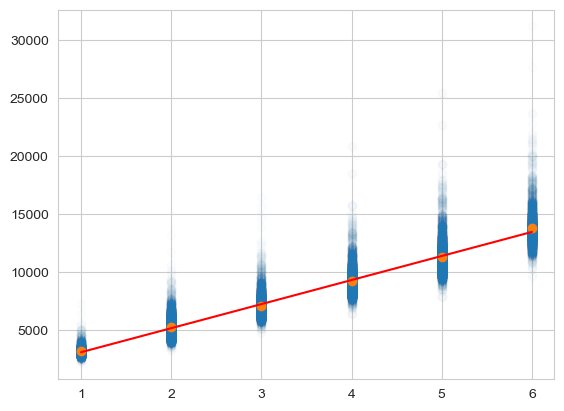

In [73]:
X = df['family_size'].values.reshape(-1, 1)
Y = df['food_cost']

model = sklearn.linear_model.LinearRegression().fit(X, Y)

# scatter plot of the data, the points are mostly transparent to help indicate where they are distributed.
plt.scatter(x=X, y=Y, alpha=0.01)
# the line of best fit
plt.plot(X, model.predict(X), 'r-')
# extra points to indicate the average food cost for each value of family size
plt.scatter(x=[i+1 for i in range(6)], y=df.groupby(['family_size'])['food_cost'].mean())

In [74]:
print(np.sqrt(mean_squared_error(Y, model.predict(X))))
print(r2_score(Y, model.predict(X)))

1011.4446868354278
0.9043907826132225


Having an integer for an independent variable is not ideal for scatter plots. That being said, it does show that the line of best fit does a pretty good job of passing through the average food costs for each family size. Along with the RMSE being only 1011, it does mean that the points are clustered around the predicted values - the transparency helps, but it doesn't quite do it justice.

#### **3.5 Exploring Regional Variation**

We can extend our analysis by looking at regional differences. 
A regional analysis could be done by looking at certain groupings of the data based for instance on:
- Metropolitan vs Non-Metropolitan areas (already done in section 2.3)
- State-level Analysis
- County-level Analysis
- Metropolitan Statical Areas (MSA) Analysis

In the following sections we will do then a state, county and MSA analysis.

##### **3.5.1 State-Level Analysis**

In [75]:
#Group by state and calculate averages
state_stats = df.groupby('state').agg({
    'total_cost': 'mean',
    'median_family_income': 'mean',
    'affordability': 'mean'   
})

#---- Total Cost ----
#Sort by total cost
state_stats_cost = state_stats.sort_values(('total_cost'))

#For visualization purposes, we can also convert the state_stats_cost to a currency format
state_stats_cost_formatted = state_stats_cost.copy()
state_stats_cost_formatted[['total_cost', 'median_family_income']] = state_stats_cost_formatted[['total_cost', 'median_family_income']].map(lambda x: f"${x:,.2f}")
print("The Average Total Cost by States:\n")
print(state_stats_cost_formatted.head())

#---- Affordability ----
#Sort by affordability
state_stats_affordability = state_stats.sort_values(('affordability'))

#For visualization purposes, we can also convert the state_stats_affordability to a currency format
state_stats_affordability_formatted = state_stats_affordability.copy()
state_stats_affordability_formatted[['total_cost', 'median_family_income']] = state_stats_affordability_formatted[['total_cost', 'median_family_income']].map(lambda x: f"${x:,.2f}")
print("\nThe Affordability by States:\n")
print(state_stats_affordability_formatted.head())

The Average Total Cost by States:

       total_cost median_family_income  affordability
state                                                
MS     $61,360.99           $52,281.52     121.888989
AR     $61,491.89           $55,025.57     113.348998
SC     $62,104.87           $60,021.24     105.692082
TN     $62,871.11           $59,715.51     107.282295
TX     $64,795.40           $66,050.29     101.690525

The Affordability by States:

       total_cost median_family_income  affordability
state                                                
RI     $83,512.77          $101,153.25      83.538656
ND     $68,709.93           $82,881.29      84.937101
NH     $74,802.49           $89,199.25      84.950401
MD     $79,001.49           $96,138.13      85.043449
CT     $90,013.50          $103,228.23      87.683411


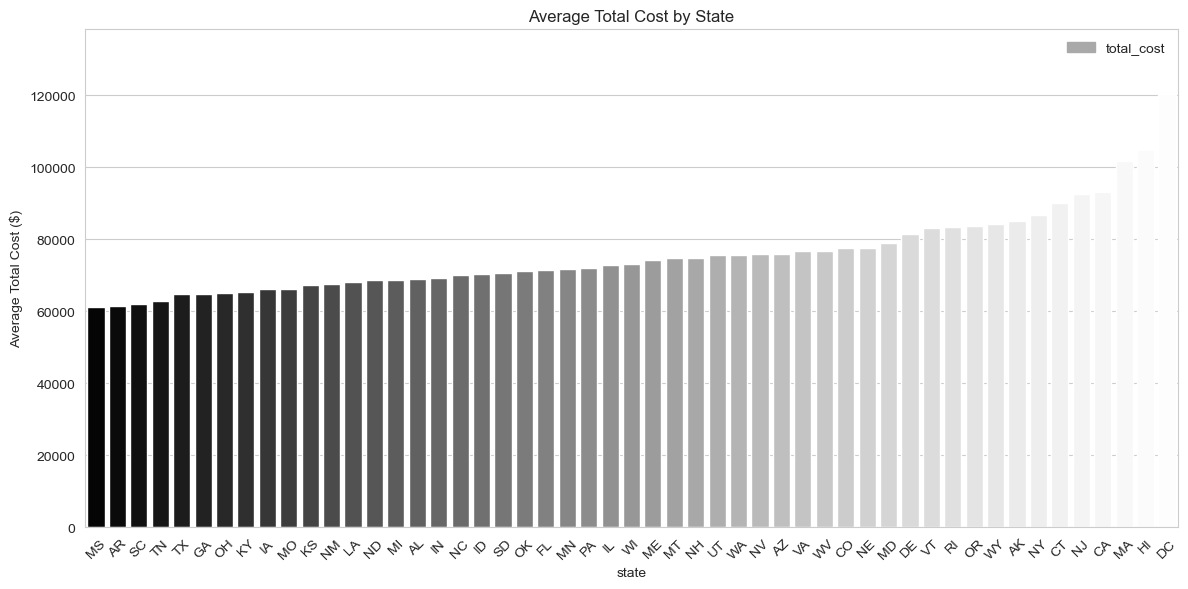

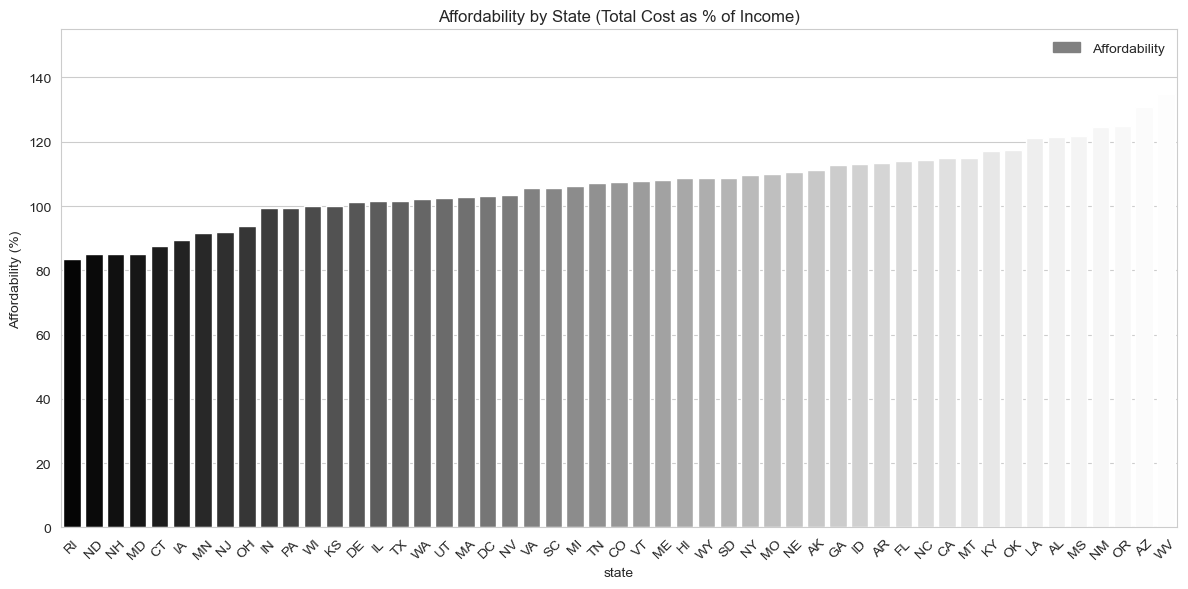

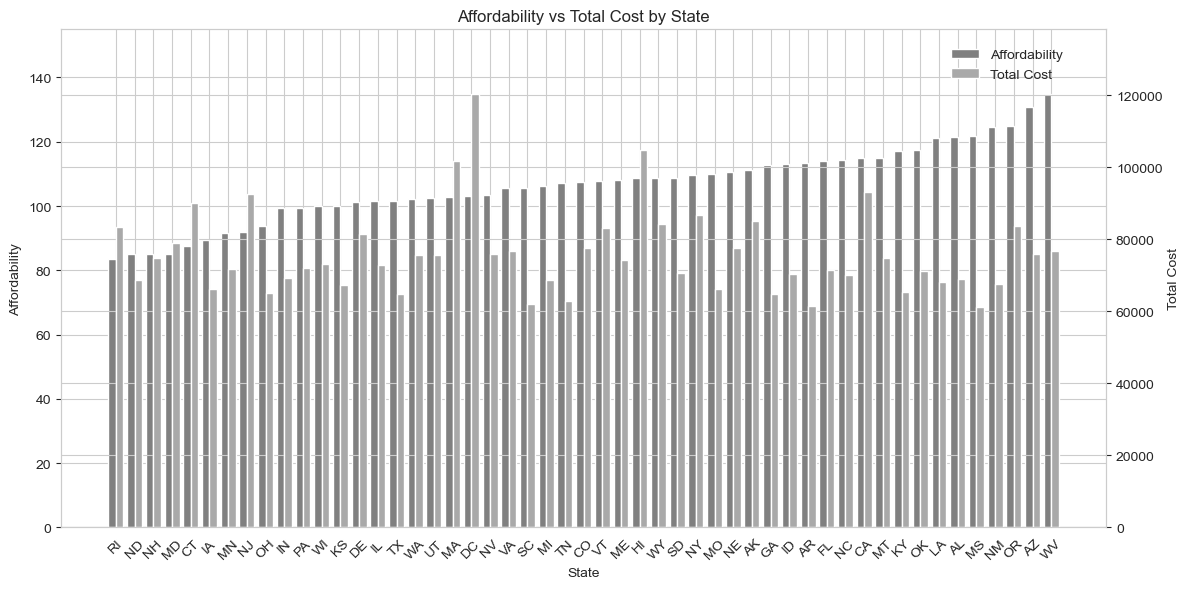

In [76]:
# Plotting the average total cost by state
# Adjusting the y-limits to add space
max_affordability_state = state_stats_cost['affordability'].max()  
max_total_cost_state = state_stats_affordability['total_cost'].max()  
# Adding space (margin) to the max values of both y-axes by 20%
affordability_margin_state = 0.15 * max_affordability_state  
total_cost_margin_state = 0.15 * max_total_cost_state  

plt.figure(figsize=(12, 6))
sns.barplot(x=state_stats_cost.index, y=state_stats_cost['total_cost'], hue=state_stats_cost.index, palette='Greys_r')
plt.title('Average Total Cost by State')
plt.xticks(rotation=45)
plt.ylabel('Average Total Cost ($)')
# Create a custom legend handle to match the bar color (using Patch)
cost_legend = [Patch(color='darkgrey', label='total_cost')]
# Add custom legend
plt.legend(handles=cost_legend, loc='upper right', frameon=False)
plt.ylim(0, max_total_cost_state + total_cost_margin_state)
plt.tight_layout()
plt.show()

# Plotting the affordability by state
plt.figure(figsize=(12, 6))
sns.barplot(x=state_stats_affordability.index, y=state_stats_affordability['affordability'], hue=state_stats_affordability.index, palette='Greys_r')
plt.title('Affordability by State (Total Cost as % of Income)')
plt.xticks(rotation=45)
plt.ylabel('Affordability (%)')
# Create a custom legend handle to match the bar color (using Patch)
affordability_legend = [Patch(color='grey', label='Affordability')]
# Add custom legend
plt.legend(handles=affordability_legend, loc='upper right', frameon=False)
plt.ylim(0, max_affordability_state + affordability_margin_state)
plt.tight_layout()
plt.show()

# Plotting state-level affordability vs the average of the total cost
fig, ax1 = plt.subplots(figsize=(12, 6))
width = 0.4
x_positions_affordability_state = range(len(state_stats_affordability))
affordability_bars_state = ax1.bar(x_positions_affordability_state, state_stats_affordability['affordability'], width=width,
                                        label='Affordability', color='grey', align='center')
ax1.set_ylabel('Affordability')
ax1.set_xlabel('State')
# Plotting a second y-axis for total_cost
ax2 = ax1.twinx()
x_positions_total_cost_state = [x + width for x in x_positions_affordability_state]
total_cost_bars_state = ax2.bar(x_positions_total_cost_state, state_stats_affordability['total_cost'], width=width, 
                                 label='Total Cost', color='darkgrey', align='center')
ax2.set_ylabel('Total Cost')

plt.title('Affordability vs Total Cost by State')
ax1.set_xticks([x + width / 2 for x in x_positions_affordability_state])  
ax1.set_xticklabels(state_stats_affordability.index, rotation=45)
handles_state, labels_state = [], []
handles_state.extend([affordability_bars_state, total_cost_bars_state])
labels_state.extend(['Affordability', 'Total Cost'])
fig.legend(handles_state, labels_state, loc='upper right', bbox_to_anchor=(0.9, 0.93), frameon=False)
ax1.set_ylim(0, max_affordability_state + affordability_margin_state)
ax2.set_ylim(0, max_total_cost_state + total_cost_margin_state)
plt.tight_layout()
plt.show()

##### **3.5.2 County-Level Analysis**

In [77]:
# Get the total cost, median family income and affordability by state and county
county_stats = df.groupby(['state', 'county']).agg({
    'total_cost': 'mean',
    'median_family_income': 'mean',
    'affordability': 'mean'
})
# Get the top 10 most expensive counties
most_expensive_county = county_stats.sort_values('total_cost', ascending=False).head(10)
# Get the top 10 least expensive counties
least_expensive_county = county_stats.sort_values('total_cost').head(10)
# Get the top 10 least affordability counties
least_affordable_county = county_stats.sort_values('affordability', ascending=False).head(10)
# Get the top 10 most affordability counties
most_affordable_county = county_stats.sort_values('affordability').head(10)
# Merg multi-index as a single one
most_expensive_county.index = most_expensive_county.index.map(lambda x: f"{x[0]} - {x[1]}")
least_expensive_county.index = least_expensive_county.index.map(lambda x: f"{x[0]} - {x[1]}")
least_affordable_county.index = least_affordable_county.index.map(lambda x: f"{x[0]} - {x[1]}")
most_affordable_county.index = most_affordable_county.index.map(lambda x: f"{x[0]} - {x[1]}")

# Converting the most_expensive_county, least_expensive_county, least_affordable_county and most_affordable_county to a currency format for visualization purposes
most_expensive_county_formatted = most_expensive_county.copy()
most_expensive_county_formatted[['total_cost', 'median_family_income']] = most_expensive_county_formatted[['total_cost', 'median_family_income']].map(lambda x: f"${x:,.2f}")
least_expensive_county_formatted = least_expensive_county.copy()
least_expensive_county_formatted[['total_cost', 'median_family_income']] = least_expensive_county_formatted[['total_cost', 'median_family_income']].map(lambda x: f"${x:,.2f}")
least_affordable_county_formatted = least_affordable_county.copy()
least_affordable_county_formatted[['total_cost', 'median_family_income']] = least_affordable_county_formatted[['total_cost', 'median_family_income']].map(lambda x: f"${x:,.2f}")
most_affordable_county_formatted = most_affordable_county.copy()
most_affordable_county_formatted[['total_cost', 'median_family_income']] = most_affordable_county_formatted[['total_cost', 'median_family_income']].map(lambda x: f"${x:,.2f}")

# Displaying the results
print("The Top 10 Most Expensive Counties:\n")
print(most_expensive_county_formatted)
print("\nThe Top 10 Least Affordable Counties:\n")
print(least_affordable_county_formatted)
print("\nThe Top 10 Least Expensive Counties:\n")
print(least_expensive_county_formatted)
print("\nThe Top 10 Most Affordable Counties:\n")
print(most_affordable_county_formatted)

The Top 10 Most Expensive Counties:

                            total_cost median_family_income  affordability
CA - San Mateo County      $167,022.47          $145,687.11     114.644646
CA - Marin County          $157,044.03          $157,777.98      99.534819
CA - San Francisco County  $142,391.32          $135,125.17     105.377349
NY - New York County       $137,874.70          $112,986.80     122.027262
CA - Santa Cruz County     $137,829.51          $105,463.25     130.689614
CA - Santa Clara County    $133,914.75          $144,424.11      92.723267
NY - Putnam County         $130,231.34          $125,987.45     103.368509
NY - Rockland County       $127,029.13          $113,247.62     112.169360
NY - Nassau County         $126,531.71          $139,281.77      90.845855
MA - Norfolk County        $126,195.67          $132,538.59      95.214278

The Top 10 Least Affordable Counties:

                            total_cost median_family_income  affordability
SD - Todd County       

**Visualizing the Top 10 Least Affordable Counties vs Total Cost by County:**

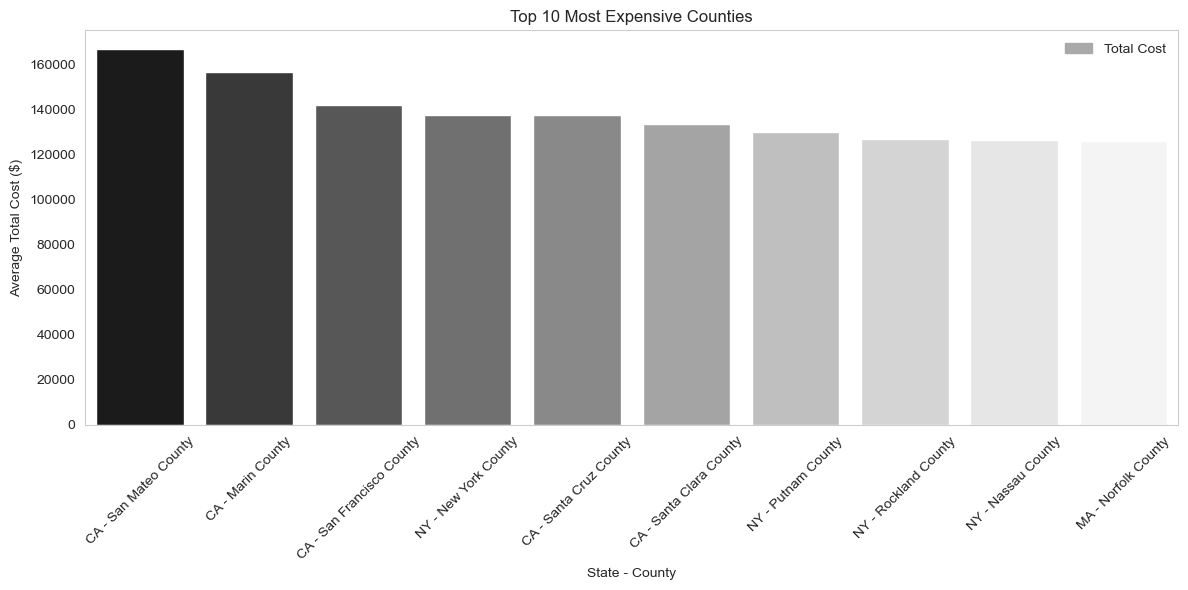

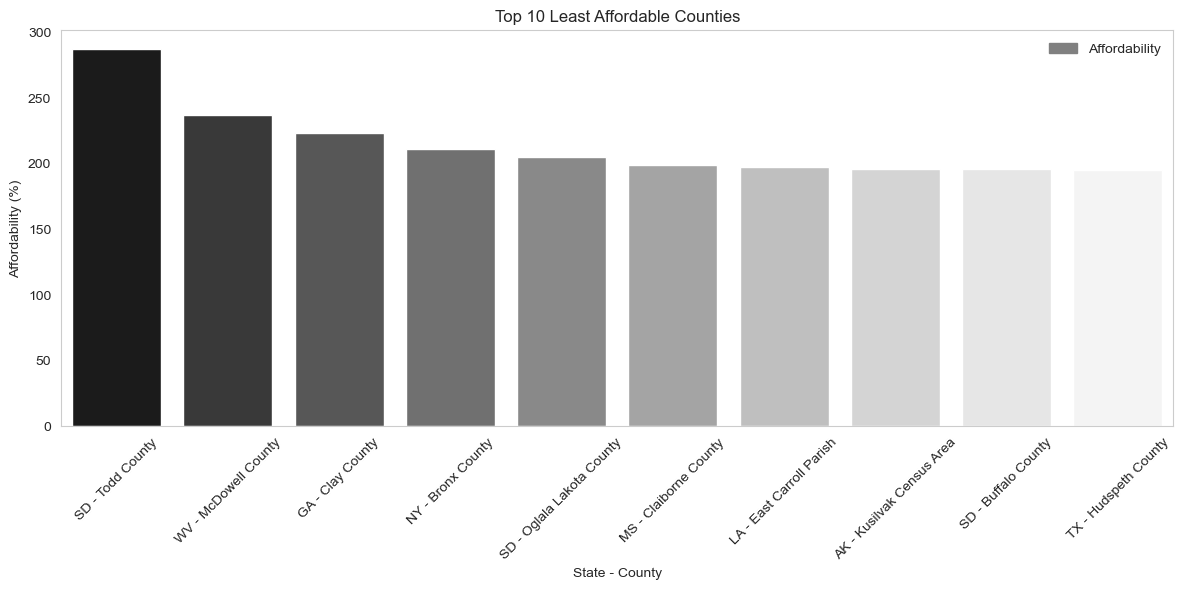

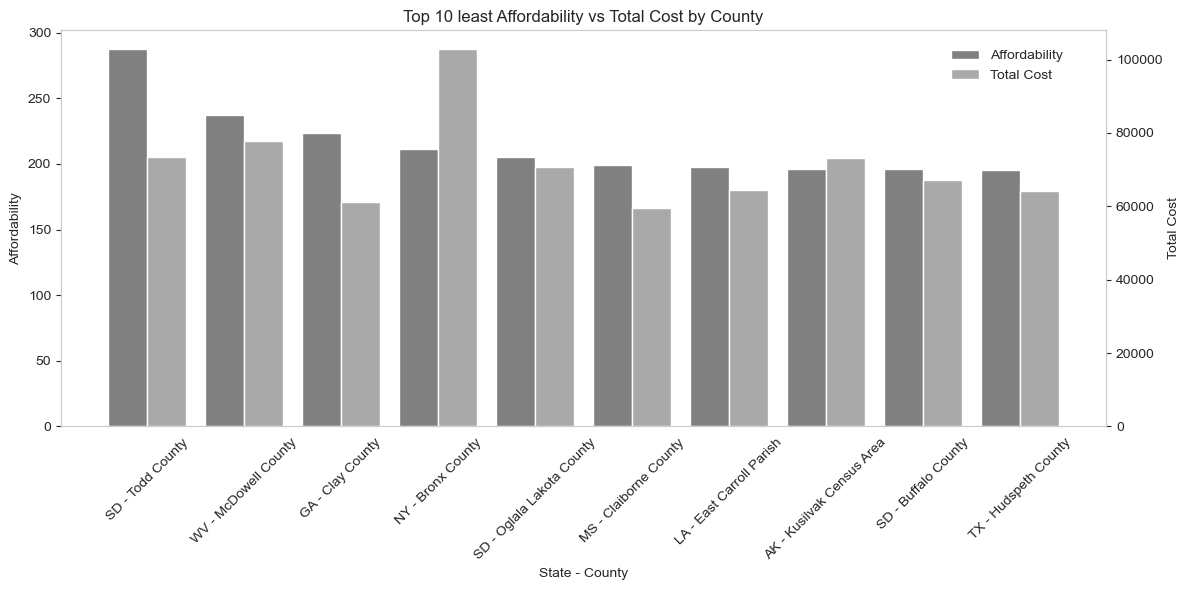

In [78]:
# Plotting the top 10 most expensive counties
plt.figure(figsize=(12, 6))
sns.barplot(x=most_expensive_county.index, y=most_expensive_county['total_cost'], hue=most_expensive_county.index, palette='Greys_r')
plt.title('Top 10 Most Expensive Counties')
plt.xlabel('State - County')
plt.xticks(rotation=45)
plt.ylabel('Average Total Cost ($)')
# Create a custom legend handle to match the bar color (using Patch)
high_cost_legend = [Patch(color='darkgrey', label='Total Cost')]
# Add custom legend
plt.legend(handles=high_cost_legend, loc='upper right', frameon=False)
plt.grid(False)  # Remove the grid
plt.tight_layout()
plt.show()

# Plotting the top 10 least affordable counties
plt.figure(figsize=(12, 6))
sns.barplot(x=least_affordable_county.index, y=least_affordable_county['affordability'], hue=least_affordable_county.index, palette='Greys_r')
plt.title('Top 10 Least Affordable Counties')
plt.xlabel('State - County')
plt.xticks(rotation=45)
plt.ylabel('Affordability (%)')
# Create a custom legend handle to match the bar color (using Patch)
least_affordability_legend = [Patch(color='grey', label='Affordability')]
# Add custom legend
plt.legend(handles=least_affordability_legend, loc='upper right', frameon=False)
plt.grid(False)  # Remove the grid
plt.tight_layout()
plt.show()

# Plotting county-level least affordability vs the average of the total cost
fig, ax3 = plt.subplots(figsize=(12, 6))
width = 0.4
x_positions_affordability_county = range(len(least_affordable_county))
affordability_bars_county = ax3.bar(x_positions_affordability_county, least_affordable_county['affordability'], width=width,
                                        label='Affordability', color='grey', align='center')
ax3.set_ylabel('Affordability')
ax3.set_xlabel('State - County')
plt.grid(False)  # Remove the grid
# Plotting a second y-axis for total_cost
ax4 = ax3.twinx()
x_positions_total_cost_county = [x + width for x in x_positions_affordability_county]
total_cost_bars_county = ax4.bar(x_positions_total_cost_county, least_affordable_county['total_cost'], width=width, 
                                 label='Total Cost', color='darkgrey', align='center')
ax4.set_ylabel('Total Cost')

plt.title('Top 10 least Affordability vs Total Cost by County')
ax3.set_xticks([x + width / 2 for x in x_positions_affordability_county])  
ax3.set_xticklabels(least_affordable_county.index, rotation=45)
handles_county, labels_county = [], []
handles_county.extend([affordability_bars_county, total_cost_bars_county])
labels_county.extend(['Affordability', 'Total Cost'])
fig.legend(handles_county, labels_county, loc='upper right', bbox_to_anchor=(0.9, 0.93), frameon=False)
#ax5.set_ylim(0, max_affordability_county + affordability_margin_county)
#ax6.set_ylim(0, max_total_cost_county + total_cost_margin_county)
plt.grid(False)  # Remove the grid
plt.tight_layout()
plt.show()

**Visualizing the Top 10 Most Affordable Counties vs Total Cost by County:**

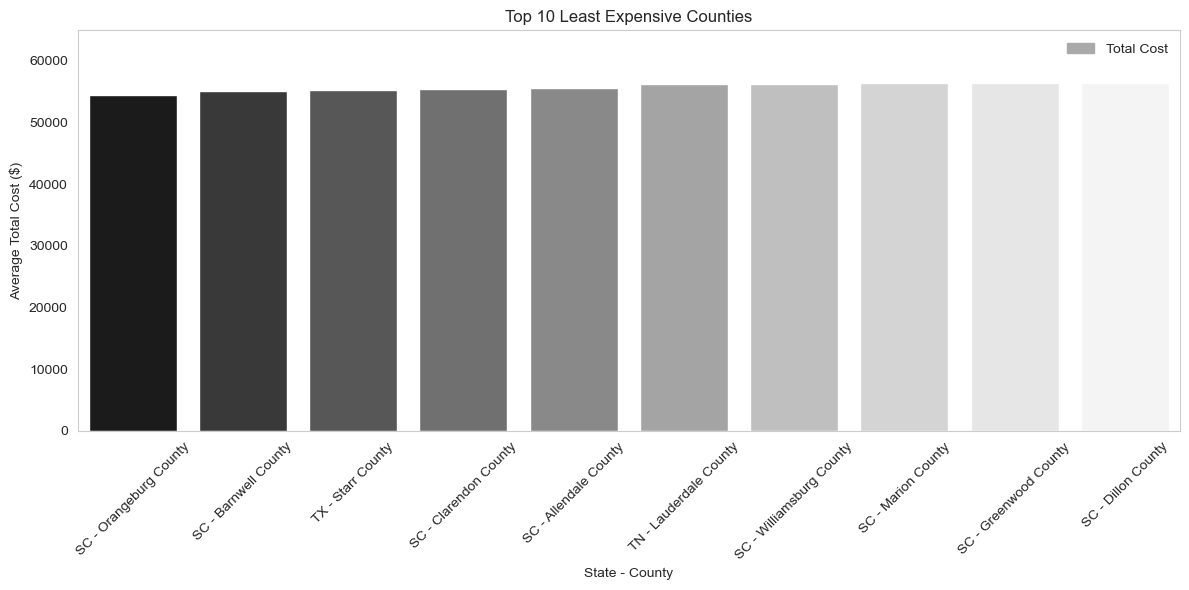

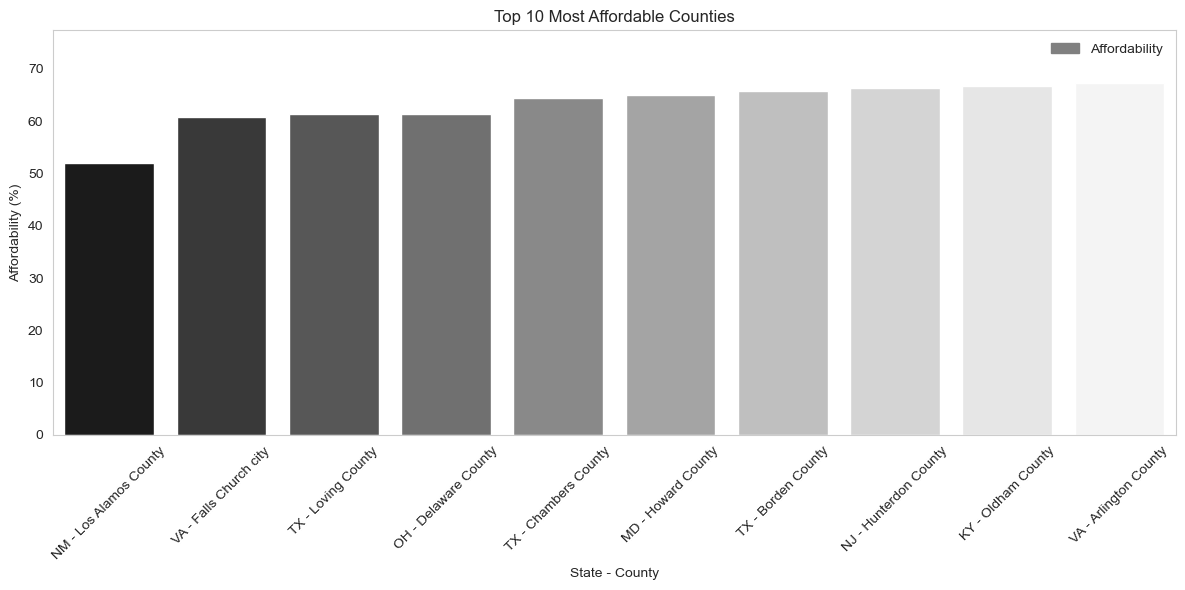

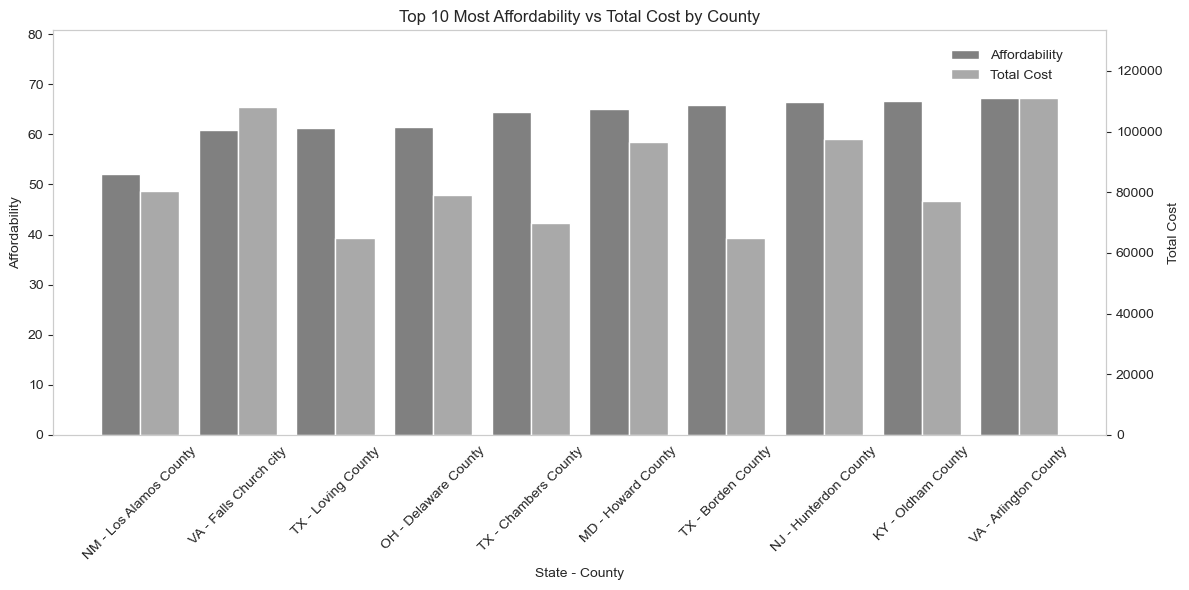

In [79]:
# Plotting the top 10 least expensive counties
#least_expensive_county.index = least_expensive_county.index.map(lambda x: f"{x[0]} - {x[1]}")
plt.figure(figsize=(12, 6))
sns.barplot(x=least_expensive_county.index, y=least_expensive_county['total_cost'], hue=least_expensive_county.index, palette='Greys_r')
plt.title('Top 10 Least Expensive Counties')
plt.xlabel('State - County')
plt.xticks(rotation=45)
plt.ylabel('Average Total Cost ($)')
# Create a custom legend handle to match the bar color (using Patch)
low_cost_legend = [Patch(color='darkgrey', label='Total Cost')]
# Add custom legend
plt.legend(handles=low_cost_legend, loc='upper right', frameon=False)
plt.grid(False)  # Remove the grid
plt.ylim(0, least_expensive_county['total_cost'].max() * 1.15) 
plt.tight_layout()
plt.show()

# Plotting the top 10 Most affordable counties
plt.figure(figsize=(12, 6))
sns.barplot(x=most_affordable_county.index, y=most_affordable_county['affordability'], hue=most_affordable_county.index, palette='Greys_r')
plt.title('Top 10 Most Affordable Counties')
plt.xlabel('State - County')
plt.xticks(rotation=45)
plt.ylabel('Affordability (%)')
# Create a custom legend handle to match the bar color (using Patch)
most_affordability_legend = [Patch(color='grey', label='Affordability')]
# Add custom legend
plt.legend(handles=most_affordability_legend, loc='upper right', frameon=False)
plt.grid(False)  # Remove the grid
plt.ylim(0, most_affordable_county['affordability'].max() * 1.15) 
plt.tight_layout()
plt.show()

# Adjusting the y-limits to add space
max_affordability_county = most_affordable_county['affordability'].max()  
max_total_cost_county = most_affordable_county['total_cost'].max()  
# Adding space (margin) to the max values of both y-axes by 20%
affordability_margin_county = 0.2 * max_affordability_county  
total_cost_margin_county = 0.2 * max_total_cost_county  

# Plotting county-level most affordability vs the average of the total cost
fig, ax5 = plt.subplots(figsize=(12, 6))
width = 0.4
x_positions_affordability_county2 = range(len(most_affordable_county))
affordability_bars_county2 = ax5.bar(x_positions_affordability_county2, most_affordable_county['affordability'], width=width,
                                        label='Affordability', color='grey', align='center')
ax5.set_ylabel('Affordability')
ax5.set_xlabel('State - County')
plt.grid(False)  # Remove the grid
# Plotting a second y-axis for total_cost
ax6 = ax5.twinx()
x_positions_total_cost_county2 = [x + width for x in x_positions_affordability_county2]
total_cost_bars_county2 = ax6.bar(x_positions_total_cost_county2, most_affordable_county['total_cost'], width=width, 
                                 label='Total Cost', color='darkgrey', align='center')
ax6.set_ylabel('Total Cost')

plt.title('Top 10 Most Affordability vs Total Cost by County')
ax5.set_xticks([x + width / 2 for x in x_positions_affordability_county2])  
ax5.set_xticklabels(most_affordable_county.index, rotation=45)
handles_county2, labels_county2 = [], []
handles_county2.extend([affordability_bars_county2, total_cost_bars_county2])
labels_county2.extend(['Affordability', 'Total Cost'])
fig.legend(handles_county2, labels_county2, loc='upper right', bbox_to_anchor=(0.9, 0.93), frameon=False)
plt.grid(False)  # Remove the grid
ax5.set_ylim(0, max_affordability_county + affordability_margin_county)
ax6.set_ylim(0, max_total_cost_county + total_cost_margin_county)
plt.tight_layout()
plt.show()

##### **3.5.3 Metropolitan Statiscal Areas (MSA) Analysis**

In [80]:
# Since we don't have exact coordinates, we can look at area names
# Extract MSA (Metropolitan Statistical Area) information # Done in the data preparation section
# df['MSA'] = df['areaname'].str.extract(r'^(.*?)(?: MSA|,|$)', expand=False)

# Analyze by MSA
msa_stats = df.groupby(['state', 'MSA']).agg({
    'total_cost': 'mean',
    'median_family_income': 'mean',
    'affordability': 'mean'
})

least_affordabilty_msa = msa_stats.sort_values('affordability', ascending=False).head(10)
most_affordabilty_msa = msa_stats.sort_values('affordability').head(10)
least_expensive_msa = msa_stats.sort_values('total_cost').head(10)
most_expensive_msa = msa_stats.sort_values('total_cost', ascending=False).head(10)

# Merg multi-index as a single one
least_affordabilty_msa.index = least_affordabilty_msa.index.map(lambda x: f"{x[0]} - {x[1]}")
most_affordabilty_msa.index = most_affordabilty_msa.index.map(lambda x: f"{x[0]} - {x[1]}")
least_expensive_msa.index = least_expensive_msa.index.map(lambda x: f"{x[0]} - {x[1]}")
most_expensive_msa.index = most_expensive_msa.index.map(lambda x: f"{x[0]} - {x[1]}")

# Converting the least_affordabilty_msa, most_affordabilty_msa, most_expensive_msa and least_expensive_msa to a currency format for visualization purposes
least_affordabilty_msa_formatted = least_affordabilty_msa.copy()
least_affordabilty_msa_formatted[['total_cost', 'median_family_income']] = least_affordabilty_msa_formatted[['total_cost', 'median_family_income']].map(lambda x: f"${x:,.2f}")
most_affordabilty_msa_formatted = most_affordabilty_msa.copy()
most_affordabilty_msa_formatted[['total_cost', 'median_family_income']] = most_affordabilty_msa_formatted[['total_cost', 'median_family_income']].map(lambda x: f"${x:,.2f}")
least_expensive_msa_formatted = least_expensive_msa.copy()
least_expensive_msa_formatted[['total_cost', 'median_family_income']] = least_expensive_msa_formatted[['total_cost', 'median_family_income']].map(lambda x: f"${x:,.2f}")
most_expensive_msa_formatted = most_expensive_msa.copy()
most_expensive_msa_formatted[['total_cost', 'median_family_income']] = most_expensive_msa_formatted[['total_cost', 'median_family_income']].map(lambda x: f"${x:,.2f}")

# Displaying the results
print("The Top 10 Most Expensive MSA Areas:\n")
print(most_expensive_msa_formatted)
print("\nThe Top 10 Least Affordable MSA Areas:\n")
print(least_affordabilty_msa_formatted)
print("\nThe Top 10 Least Expensive MSA Areas:\n")
print(least_expensive_msa_formatted)
print("\nThe Top 10 Most Affordable MSA Areas:\n")
print(most_affordabilty_msa_formatted)

The Top 10 Most Expensive MSA Areas:

                                       total_cost median_family_income  \
CA - San Francisco                    $155,485.94          $146,196.76   
CA - Santa Cruz-Watsonville           $137,829.51          $105,463.25   
CA - San Jose-Sunnyvale-Santa Clara   $133,914.75          $144,424.11   
NY - Nassau-Suffolk                   $126,074.59          $130,564.01   
NY - Westchester County               $122,778.32          $128,014.41   
NY - New York                         $122,290.97           $93,314.87   
DC - Washington-Arlington-Alexandria  $120,289.64          $116,607.39   
CA - Oakland-Fremont                  $118,227.60          $120,214.12   
CA - Santa Maria-Santa Barbara        $116,973.30           $87,471.20   
HI - Urban Honolulu                   $116,321.46          $103,898.37   

                                      affordability  
CA - San Francisco                       106.518938  
CA - Santa Cruz-Watsonville            

**Visualizing the Top 10 Least Affordable MSAs vs Total Cost by MSA:**

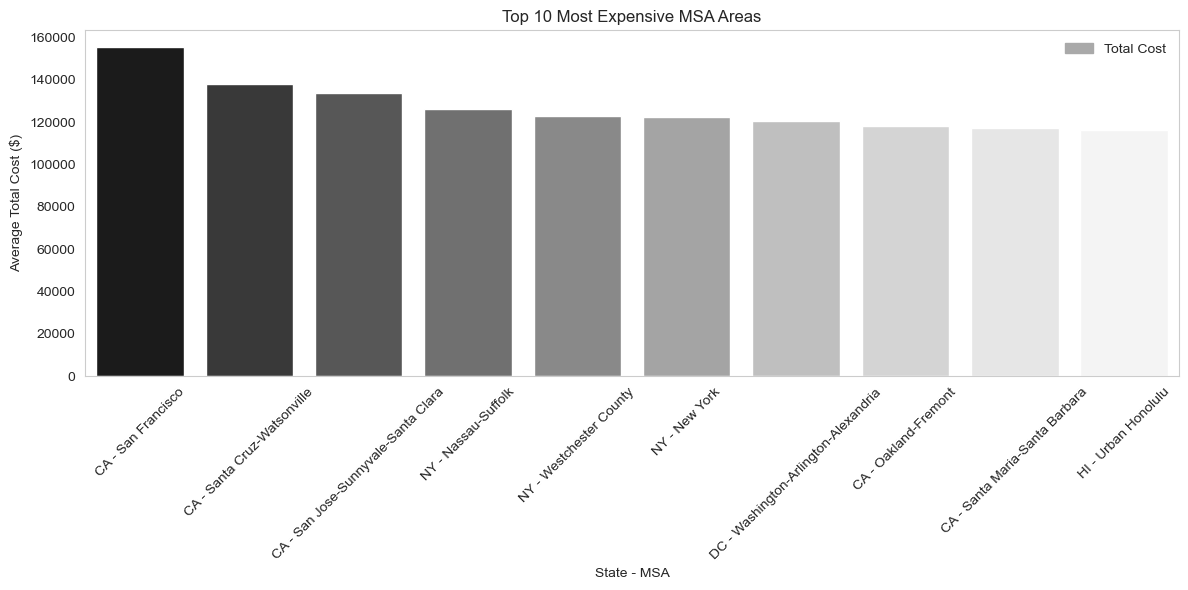

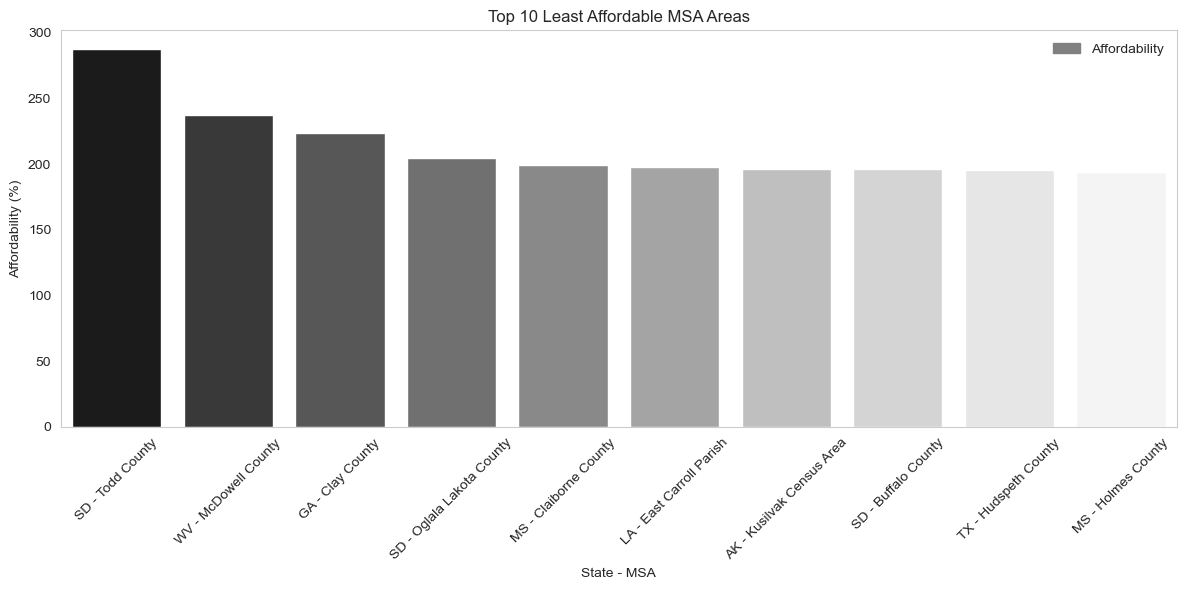

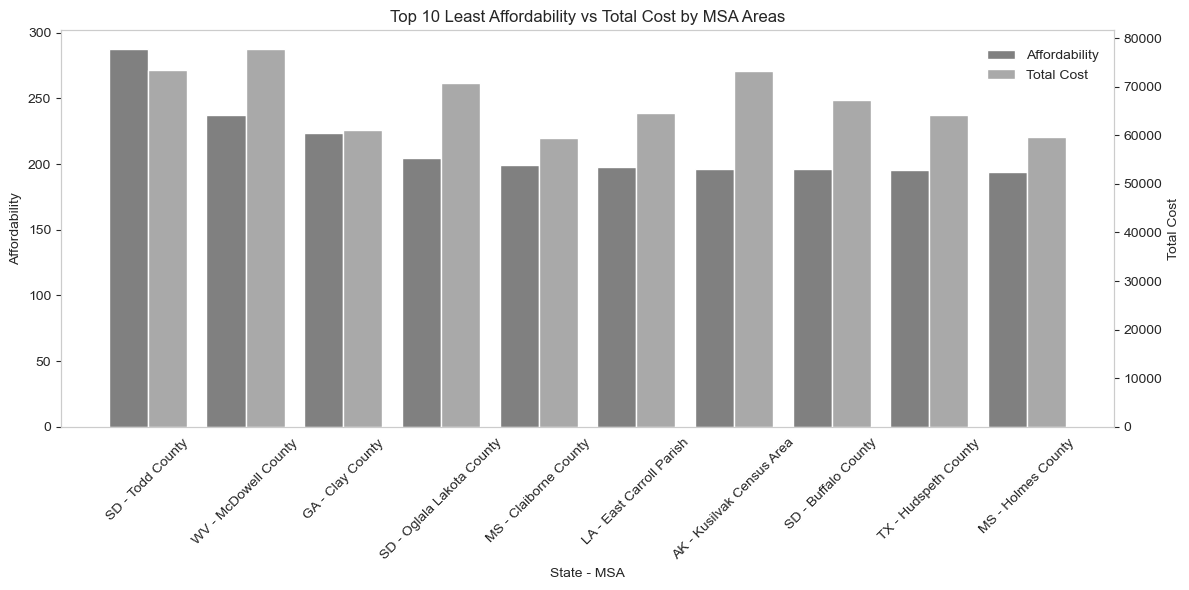

In [81]:
# Plotting the top 10 most expensive MSA areas
plt.figure(figsize=(12, 6))
sns.barplot(x=most_expensive_msa.index, y=most_expensive_msa['total_cost'], hue=most_expensive_msa.index, palette='Greys_r')
plt.title('Top 10 Most Expensive MSA Areas')
plt.xlabel('State - MSA')
plt.xticks(rotation=45)
plt.ylabel('Average Total Cost ($)')
# Create a custom legend handle to match the bar color (using Patch)
high_cost_legend = [Patch(color='darkgrey', label='Total Cost')]
# Add custom legend
plt.legend(handles=high_cost_legend, loc='upper right', frameon=False)
plt.grid(False)  # Remove the grid
plt.tight_layout()
plt.show()

# Plotting the top 10 least affordable MSA areas
plt.figure(figsize=(12, 6))
sns.barplot(x=least_affordabilty_msa.index, y=least_affordabilty_msa['affordability'], hue=least_affordabilty_msa.index, palette='Greys_r')
plt.title('Top 10 Least Affordable MSA Areas')
plt.xlabel('State - MSA')
plt.xticks(rotation=45)
plt.ylabel('Affordability (%)')
# Create a custom legend handle to match the bar color (using Patch)
least_affordability_legend = [Patch(color='grey', label='Affordability')]
# Add custom legend
plt.legend(handles=least_affordability_legend, loc='upper right', frameon=False)
plt.grid(False)  # Remove the grid
plt.tight_layout()
plt.show()

# Plotting area-level least affordability vs the average of the total cost
fig, ax7 = plt.subplots(figsize=(12, 6))
width = 0.4
x_positions_affordability_msa = range(len(least_affordabilty_msa))
affordability_bars_msa = ax7.bar(x_positions_affordability_msa, least_affordabilty_msa['affordability'], width=width,
                                        label='Affordability', color='grey', align='center')
ax7.set_ylabel('Affordability')
ax7.set_xlabel('State - MSA')
plt.grid(False)  # Remove the grid
# Plotting a second y-axis for total_cost
ax8 = ax7.twinx()
x_positions_total_cost_msa = [x + width for x in x_positions_affordability_msa]
total_cost_bars_msa = ax8.bar(x_positions_total_cost_msa, least_affordabilty_msa['total_cost'], width=width, 
                                 label='Total Cost', color='darkgrey', align='center')
ax8.set_ylabel('Total Cost')

plt.title('Top 10 Least Affordability vs Total Cost by MSA Areas')
ax7.set_xticks([x + width / 2 for x in x_positions_affordability_msa])  
ax7.set_xticklabels(least_affordabilty_msa.index, rotation=45)
handles_msa, labels_msa = [], []
handles_msa.extend([affordability_bars_msa, total_cost_bars_msa])
labels_msa.extend(['Affordability', 'Total Cost'])
fig.legend(handles_msa, labels_msa, loc='upper right', bbox_to_anchor=(0.93, 0.93), frameon=False)
plt.grid(False)  # Remove the grid
#ax7.ylim(0, max_affordability_msa + affordability_margin_msa)
#ax8.ylim(0, max_total_cost_msa + total_cost_margin_msa)
plt.tight_layout()
plt.show()

**Visualizing the Top 10 Most Affordable MSAs vs Total Cost by MSA:**

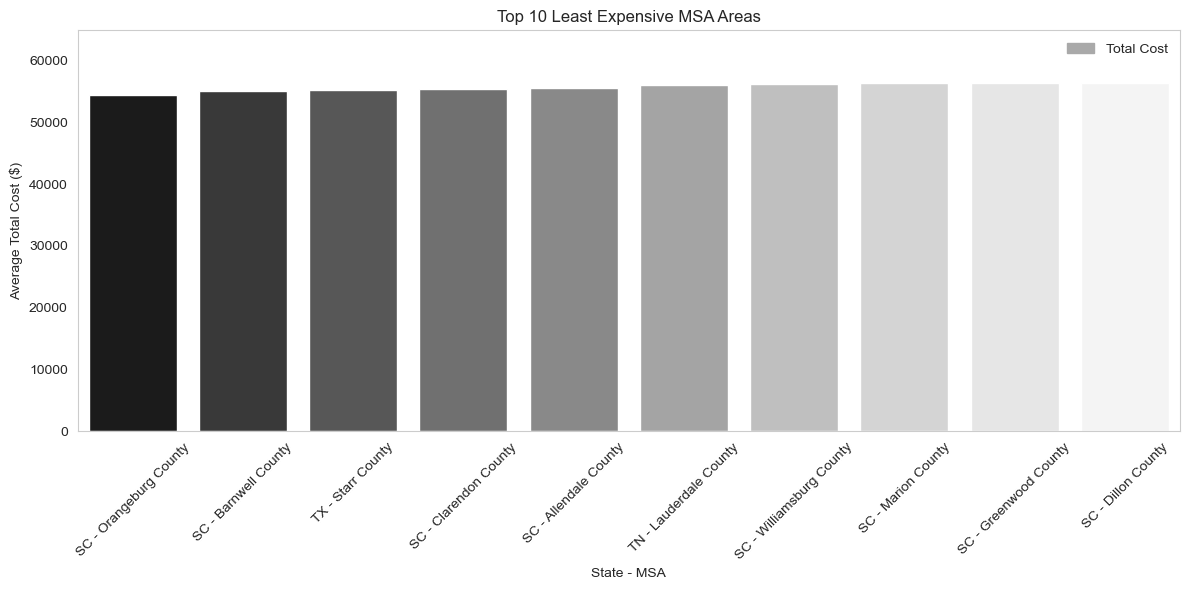

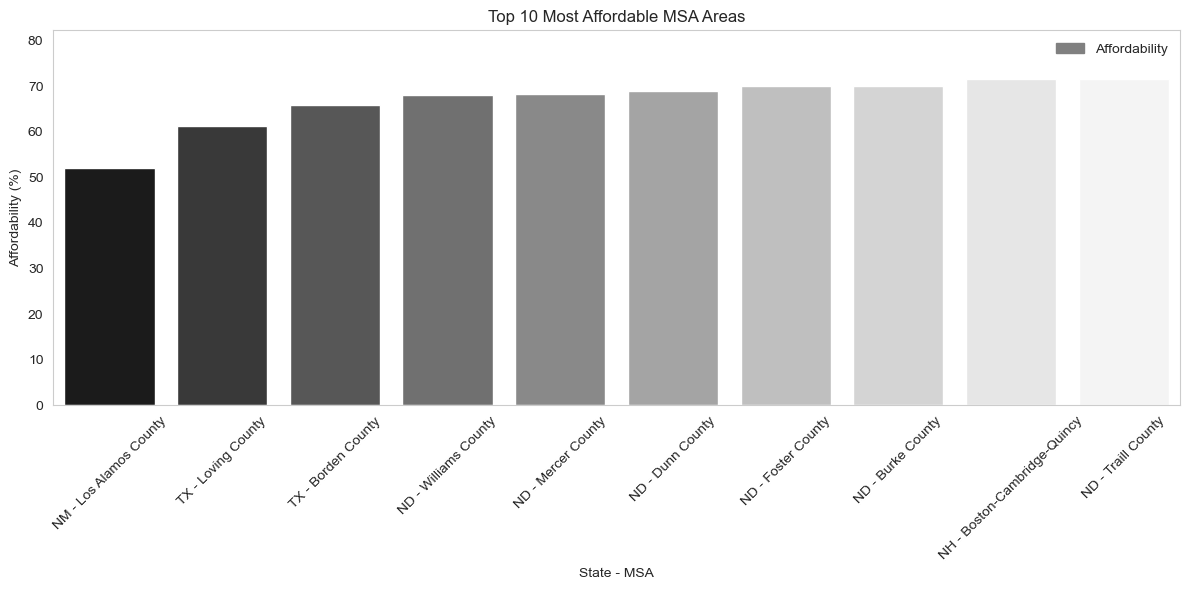

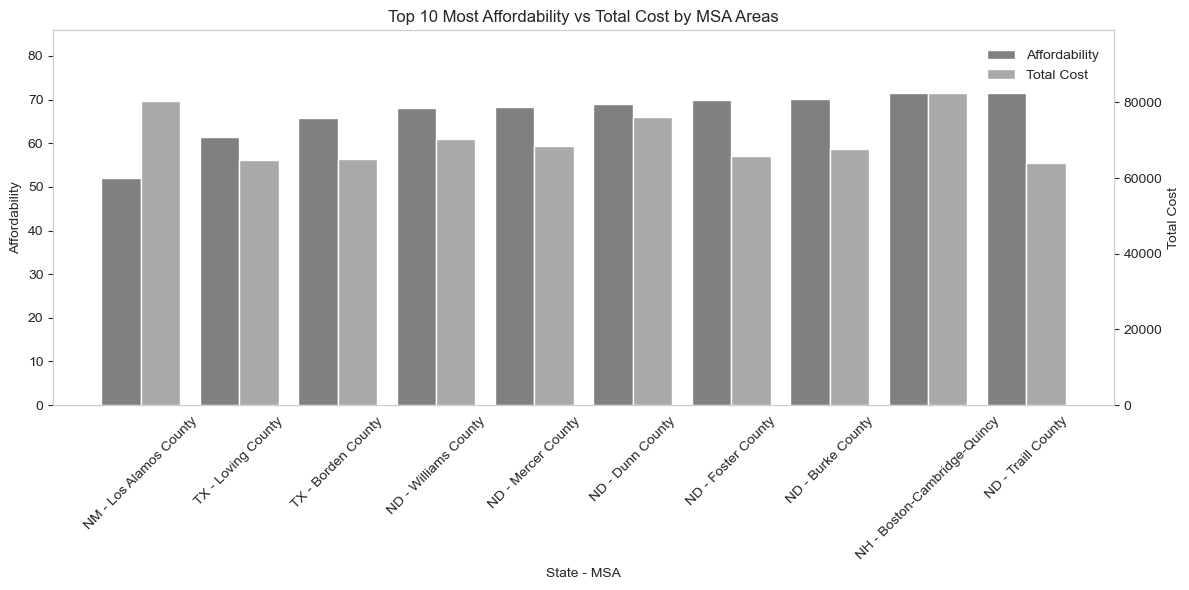

In [82]:
# Plotting the top 10 least expensive MSA areas
plt.figure(figsize=(12, 6))
sns.barplot(x=least_expensive_msa.index, y=least_expensive_msa['total_cost'], hue=least_expensive_msa.index, palette='Greys_r')
plt.title('Top 10 Least Expensive MSA Areas')
plt.xlabel('State - MSA')
plt.xticks(rotation=45)
plt.ylabel('Average Total Cost ($)')
# Create a custom legend handle to match the bar color (using Patch)
low_cost_legend = [Patch(color='darkgrey', label='Total Cost')]
# Add custom legend
plt.legend(handles=low_cost_legend, loc='upper right', frameon=False)
plt.grid(False)  # Remove the grid
plt.ylim(0, least_expensive_msa['total_cost'].max() * 1.15) 
plt.tight_layout()
plt.show()

# Plotting the top 10 Most affordable MSA areas
plt.figure(figsize=(12, 6))
sns.barplot(x=most_affordabilty_msa.index, y=most_affordabilty_msa['affordability'], hue=most_affordabilty_msa.index, palette='Greys_r')
plt.title('Top 10 Most Affordable MSA Areas')
plt.xlabel('State - MSA')
plt.xticks(rotation=45)
plt.ylabel('Affordability (%)')
# Create a custom legend handle to match the bar color (using Patch)
most_affordability_legend = [Patch(color='grey', label='Affordability')]
# Add custom legend
plt.legend(handles=most_affordability_legend, loc='upper right', frameon=False)
plt.grid(False)  # Remove the grid
plt.ylim(0, most_affordabilty_msa['affordability'].max() * 1.15) 
plt.tight_layout()
plt.show()

# Adjusting the y-limits to add space
max_affordability_msa = most_affordabilty_msa['affordability'].max()  
max_total_cost_msa = most_affordabilty_msa['total_cost'].max()  
# Adding space (margin) to the max values of both y-axes by 20%
affordability_margin_msa = 0.2 * max_affordability_msa  
total_cost_margin_msa = 0.2 * max_total_cost_msa  

# Plotting area-level most affordability vs the average of the total cost
fig, ax9 = plt.subplots(figsize=(12, 6))
width = 0.4
x_positions_affordability_msa2 = range(len(most_affordabilty_msa))
affordability_bars_msa2 = ax9.bar(x_positions_affordability_msa2, most_affordabilty_msa['affordability'], width=width,
                                        label='Affordability', color='grey', align='center')
ax9.set_ylabel('Affordability')
ax9.set_xlabel('State - MSA')
plt.grid(False)  # Remove the grid
# Plotting a second y-axis for total_cost
ax10 = ax9.twinx()
x_positions_total_cost_msa2 = [x + width for x in x_positions_affordability_msa2]
total_cost_bars_msa2 = ax10.bar(x_positions_total_cost_msa2, most_affordabilty_msa['total_cost'], width=width, 
                                 label='Total Cost', color='darkgrey', align='center')
ax10.set_ylabel('Total Cost')

plt.title('Top 10 Most Affordability vs Total Cost by MSA Areas')
ax9.set_xticks([x + width / 2 for x in x_positions_affordability_msa2])  
ax9.set_xticklabels(most_affordabilty_msa.index, rotation=45)
handles_msa2, labels_msa2 = [], []
handles_msa2.extend([affordability_bars_msa2, total_cost_bars_msa2])
labels_msa2.extend(['Affordability', 'Total Cost'])
fig.legend(handles_msa2, labels_msa2, loc='upper right', bbox_to_anchor=(0.93, 0.93), frameon=False)
plt.grid(False)  # Remove the grid
#ax7.ylim(0, max_affordability_msa + affordability_margin_msa)
#ax8.ylim(0, max_total_cost_msa + total_cost_margin_msa)
ax9.set_ylim(0, max_affordability_msa + affordability_margin_msa)
ax10.set_ylim(0, max_total_cost_msa + total_cost_margin_msa)
plt.tight_layout()
plt.show()

#### **3.6 Individual Expense Categories**

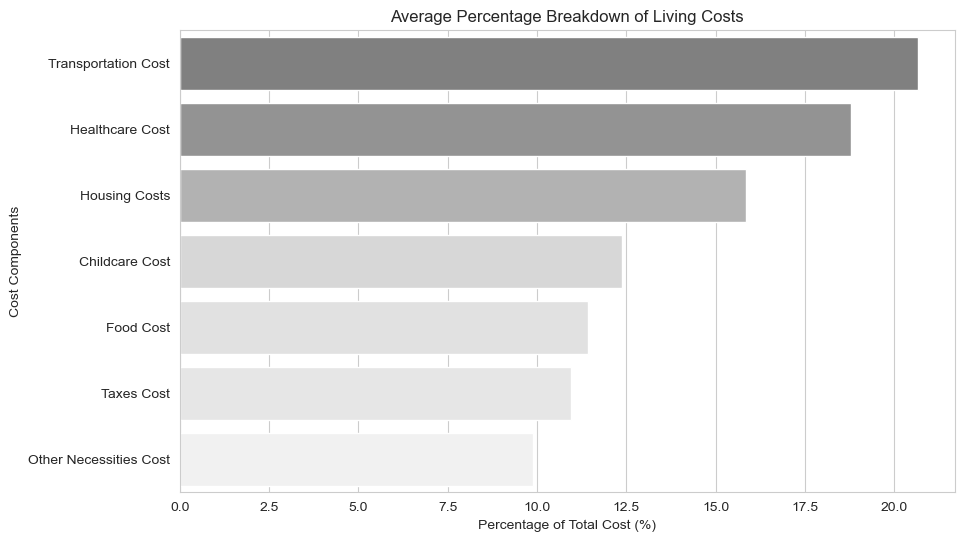

In [83]:
# User-friendly labels mapping
user_friendly_labels = {
    'housing_cost_pct': 'Housing Costs',
    'food_cost_pct': 'Food Cost',
    'transportation_cost_pct': 'Transportation Cost',
    'healthcare_cost_pct': 'Healthcare Cost',
    'other_necessities_cost_pct': 'Other Necessities Cost',
    'childcare_cost_pct': 'Childcare Cost',
    'taxes_pct': 'Taxes Cost'
}

# Calculate the percentage breakdown of costs
cost_components = ['housing_cost', 'food_cost', 'transportation_cost', 
                   'healthcare_cost', 'other_necessities_cost', 'childcare_cost', 'taxes']

for component in cost_components:
    df[f'{component}_pct'] = (df[component] / df['total_cost']) * 100

# Average percentage breakdown for each cost component
component_pct = df[[f'{c}_pct' for c in cost_components]].mean().sort_values(ascending=False)

# Map user-friendly labels to the index
component_pct.index = component_pct.index.map(user_friendly_labels)
# Reverse the component_pct.values to ensure larger values get darker colors
component_pct_normalized = (component_pct.values - component_pct.values.min()) / (component_pct.values.max() - component_pct.values.min())
# Create the color palette based on the reversed normalized values
palette = sns.light_palette("grey", as_cmap=True)

# Plot the barplot with a manually adjusted color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=component_pct.values, 
            y=component_pct.index, 
            hue=component_pct_normalized,
            palette=palette,
           legend=False)  

# Title and labels
plt.title('Average Percentage Breakdown of Living Costs')
plt.xlabel('Percentage of Total Cost (%)')
plt.ylabel('Cost Components')

# Show the plot
plt.show()
